# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: India (^BSESN)

In [124]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [125]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Reading the datas (Source: Yahoo Finance)**

In [126]:
getSymbols("^BSESN", from = '2000-01-01', to = '2021-10-31') 

Warning message:
“^BSESN contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^BSESN"

**Checking data frequency**

In [127]:
periodicity(BSESN)        

Daily periodicity from 2000-01-03 to 2021-10-29 

**Identifying missing values (%)**

In [128]:
round(prop.table(table(is.na(BSESN)))*100, digits = 2)       


FALSE  TRUE 
98.48  1.52 

**Removing missing values**

In [129]:
BSESN <- na.omit(BSESN)    
round(prop.table(table(is.na(BSESN)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [130]:
BSESN.df <- BSESN[,'BSESN.Close']                              
head(BSESN.df)

           BSESN.Close
2000-01-03     5375.11
2000-01-04     5491.01
2000-01-05     5357.00
2000-01-06     5421.53
2000-01-07     5414.48
2000-01-10     5518.39

**Calculating log-returns**

In [131]:
logreturn <- diff(log(BSESN.df$BSESN.Close))*100                     
head(logreturn)

           BSESN.Close
2000-01-03          NA
2000-01-04   2.1333153
2000-01-05  -2.4708050
2000-01-06   1.1973907
2000-01-07  -0.1301181
2000-01-10   1.9009333

**Aggregating the data**

In [132]:
BSESN.df$BSESN.Return <- logreturn                  
BSESN.df <- na.omit(BSESN.df)
head(BSESN.df)

           BSESN.Close BSESN.Return
2000-01-04     5491.01    2.1333153
2000-01-05     5357.00   -2.4708050
2000-01-06     5421.53    1.1973907
2000-01-07     5414.48   -0.1301181
2000-01-10     5518.39    1.9009333
2000-01-11     5296.30   -4.1077749

**Identifying missing values (%)**

In [133]:
round(prop.table(table(is.na(BSESN.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [134]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



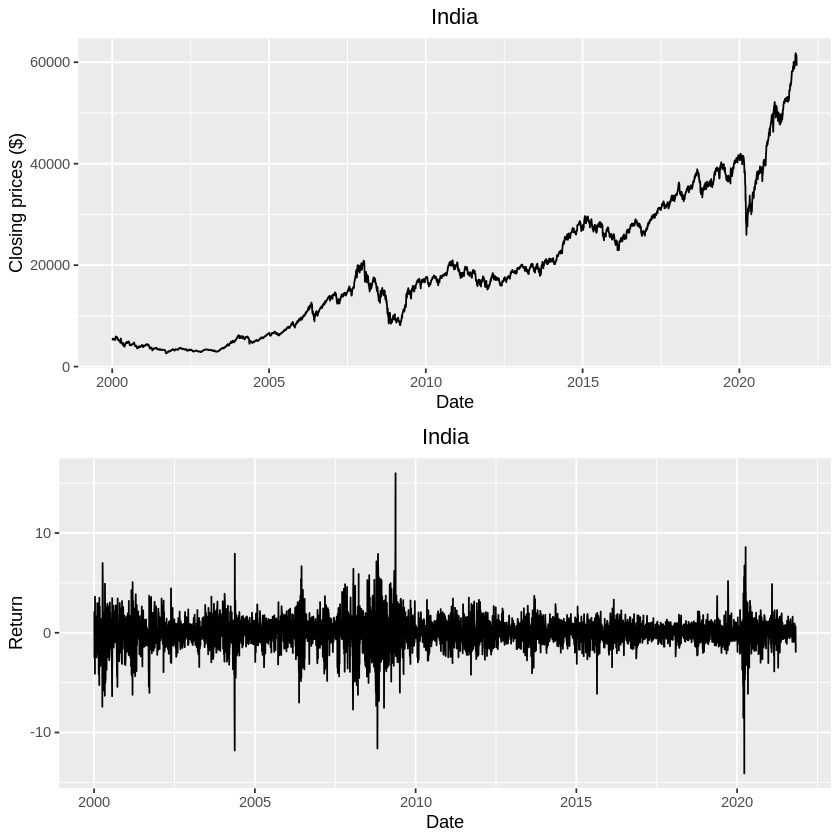

In [135]:
# Price chart
graph1 <- ggplot(BSESN.df,
                aes(x = index(BSESN.df), y = BSESN.df[,'BSESN.Close'])) +
                geom_line(color = "black") +
                ggtitle("India") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(BSESN.df,
                aes(x = index(BSESN.df), y = BSESN.df[,'BSESN.Return'])) +
                geom_line(color = "black") +
                ggtitle("India") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [136]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Descriptive statistic**

In [137]:
# mean
round(mean(BSESN.df$BSESN.Return), 3)                         

[1] 0.045

In [138]:
# sd
round(sd(BSESN.df$BSESN.Return), 3)                           

[1] 1.458

In [139]:
# skewness
round(skewness(BSESN.df$BSESN.Return), 3)                     

[1] -0.386

In [140]:
# kurtosis
round(kurtosis(BSESN.df$BSESN.Return), 3)                     

[1] 9.306

In [141]:
# min
round(min(BSESN.df$BSESN.Return), 3)                          

[1] -14.102

In [142]:
# p5
round(quantile(BSESN.df$BSESN.Return, probs = 0.05), 3)       

5% 
-2.21

In [143]:
# p25
round(quantile(BSESN.df$BSESN.Return, probs = 0.25), 3)       

25% 
-0.613

In [144]:
# median
round(median(BSESN.df$BSESN.Return), 3)                       

[1] 0.093

In [145]:
# p75
round(quantile(BSESN.df$BSESN.Return, probs = 0.75), 3)       

75% 
0.759

In [146]:
# p95
round(quantile(BSESN.df$BSESN.Return, probs = 0.95), 3)       

95% 
2.12

In [147]:
# max
round(max(BSESN.df$BSESN.Return), 3)                          

[1] 15.99

In [148]:
# n observations
length(BSESN.df$BSESN.Return)                                 

[1] 5380

## 4. Series normality analysis

In [149]:
# Package
library(tseries)

In [150]:
jarque.bera.test(BSESN.df$BSESN.Return)


	Jarque Bera Test

data:  BSESN.df$BSESN.Return
X-squared = 19545, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [151]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

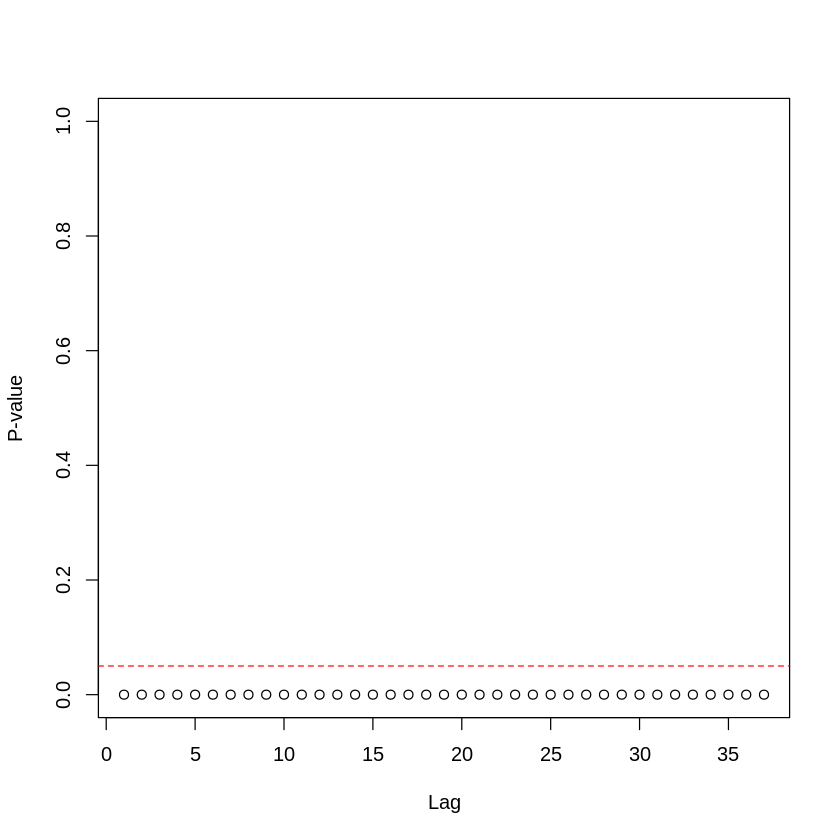

In [152]:
McLeod.Li.test(y = BSESN.df$BSESN.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [153]:
ArchTest(BSESN.df$BSESN.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  BSESN.df$BSESN.Return
Chi-squared = 778.21, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [154]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [155]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [156]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [157]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = BSESN.df$BSESN.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0818,0.0137,5.9738,0
omega,0.0242,0.0043,5.6234,0
alpha1,0.1065,0.0082,12.9558,0
beta1,0.8830,0.0086,103.2762,0
skew,0.8963,0.0153,58.6751,0


In [158]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

BSESN.df$BSESN.VolGARCH <- as.numeric(var.garch)
head(BSESN.df)

A Time Series:
[1] 2.126131 2.350054 2.793619 2.623667 2.345789 2.448190

           BSESN.Close BSESN.Return BSESN.VolGARCH
2000-01-04     5491.01    2.1333153       2.126131
2000-01-05     5357.00   -2.4708050       2.350054
2000-01-06     5421.53    1.1973907       2.793619
2000-01-07     5414.48   -0.1301181       2.623667
2000-01-10     5518.39    1.9009333       2.345789
2000-01-11     5296.30   -4.1077749       2.448190

**EGARCH model**

In [159]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [160]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = BSESN.df$BSESN.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0454,0.0133,3.4197,6e-04
omega,0.0140,0.0024,5.8551,0e+00
alpha1,-0.0816,0.0073,-11.1281,0e+00
beta1,0.9769,0.0010,933.5210,0e+00
gamma1,0.2055,0.0122,16.7919,0e+00
skew,0.9017,0.0154,58.3939,0e+00


In [161]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

BSESN.df$BSESN.VolEGARCH <- as.numeric(var.egarch)
head(BSESN.df)

A Time Series:
[1] 2.124748 2.146147 2.971471 2.709319 2.349738 2.303703

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.126131        2.124748
2000-01-05     5357.00   -2.4708050       2.350054        2.146147
2000-01-06     5421.53    1.1973907       2.793619        2.971471
2000-01-07     5414.48   -0.1301181       2.623667        2.709319
2000-01-10     5518.39    1.9009333       2.345789        2.349738
2000-01-11     5296.30   -4.1077749       2.448190        2.303703

**GJR-GARCH model**

In [162]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [163]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = BSESN.df$BSESN.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0538,0.0138,3.8878,1e-04
omega,0.0293,0.0045,6.5894,0e+00
alpha1,0.0461,0.0073,6.3543,0e+00
beta1,0.8832,0.0084,105.4054,0e+00
gamma1,0.1106,0.0131,8.4228,0e+00
skew,0.9046,0.0155,58.4793,0e+00


In [164]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

BSESN.df$BSESN.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(BSESN.df)

A Time Series:
[1] 2.124831 2.105456 2.887454 2.639854 2.366146 2.276493

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.126131        2.124748
2000-01-05     5357.00   -2.4708050       2.350054        2.146147
2000-01-06     5421.53    1.1973907       2.793619        2.971471
2000-01-07     5414.48   -0.1301181       2.623667        2.709319
2000-01-10     5518.39    1.9009333       2.345789        2.349738
2000-01-11     5296.30   -4.1077749       2.448190        2.303703
           BSESN.VolGJRGARCH
2000-01-04          2.124831
2000-01-05          2.105456
2000-01-06          2.887454
2000-01-07          2.639854
2000-01-10          2.366146
2000-01-11          2.276493

## 7. Realized GARCH model estimation

In [165]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [166]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, BSESN.df$BSESN.Return,
                          solver = 'hybrid',
                          realizedVol = BSESN.df$BSESN.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0347,0.0206,1.6845,0.0921
alpha1,0.9742,0.0268,36.3972,0.0000
beta1,0.0067,0.0137,0.4927,0.6222
eta11,0.0054,0.0020,2.6545,0.0079
eta21,0.0082,0.0010,8.1338,0.0000
delta,1.0029,0.0239,41.9888,0.0000
lambda,0.1473,0.0014,103.7277,0.0000
skew,0.8916,0.0148,60.3676,0.0000
xi,-0.0300,0.0210,-1.4230,0.1547


In [167]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

BSESN.df$BSESN.VolRealGARCH <- as.numeric(var.realgarch)
head(BSESN.df)

A Time Series:
[1] 2.126739 2.169618 2.392245 2.832957 2.667965 2.391339

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.126131        2.124748
2000-01-05     5357.00   -2.4708050       2.350054        2.146147
2000-01-06     5421.53    1.1973907       2.793619        2.971471
2000-01-07     5414.48   -0.1301181       2.623667        2.709319
2000-01-10     5518.39    1.9009333       2.345789        2.349738
2000-01-11     5296.30   -4.1077749       2.448190        2.303703
           BSESN.VolGJRGARCH BSESN.VolRealGARCH
2000-01-04          2.124831           2.126739
2000-01-05          2.105456           2.169618
2000-01-06          2.887454           2.392245
2000-01-07          2.639854           2.832957
2000-01-10          2.366146           2.667965
2000-01-11          2.276493           2.391339

**Realized EGARCH**

In [168]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, BSESN.df$BSESN.Return,
                            solver = 'hybrid',
                            realizedVol = BSESN.df$BSESN.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0280,0.0205,1.3676,0.1714
alpha1,0.9917,0.0262,37.8999,0.0000
beta1,0.0023,0.0135,0.1708,0.8644
eta11,-0.0005,0.0022,-0.2408,0.8097
eta21,0.0090,0.0011,8.0504,0.0000
delta,0.9860,0.0224,44.0819,0.0000
lambda,0.1612,0.0016,103.7287,0.0000
skew,0.8961,0.0150,59.8580,0.0000
xi,-0.0214,0.0204,-1.0490,0.2942


In [169]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

BSESN.df$BSESN.VolRealEGARCH <- as.numeric(var.realegarch)
head(BSESN.df)

A Time Series:
[1] 2.126739 2.175140 2.196977 3.033681 2.770233 2.404915

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.126131        2.124748
2000-01-05     5357.00   -2.4708050       2.350054        2.146147
2000-01-06     5421.53    1.1973907       2.793619        2.971471
2000-01-07     5414.48   -0.1301181       2.623667        2.709319
2000-01-10     5518.39    1.9009333       2.345789        2.349738
2000-01-11     5296.30   -4.1077749       2.448190        2.303703
           BSESN.VolGJRGARCH BSESN.VolRealGARCH BSESN.VolRealEGARCH
2000-01-04          2.124831           2.126739            2.126739
2000-01-05          2.105456           2.169618            2.175140
2000-01-06          2.887454           2.392245            2.196977
2000-01-07          2.639854           2.832957            3.033681
2000-01-10          2.366146           2.667965            2.770233
2000-01-11          2.276493           2.391339            2.404915

**Realized GJR-GARCH**

In [170]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, BSESN.df$BSESN.Return,
                              solver = 'hybrid',
                              realizedVol = BSESN.df$BSESN.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0341,0.0205,1.6599,0.0969
alpha1,0.9701,0.0264,36.7122,0.0000
beta1,0.0023,0.0135,0.1705,0.8646
eta11,-0.0003,0.0022,-0.1415,0.8875
eta21,0.0085,0.0011,7.6778,0.0000
delta,1.0088,0.0239,42.2535,0.0000
lambda,0.1625,0.0016,103.7290,0.0000
skew,0.8990,0.0150,59.9611,0.0000
xi,-0.0285,0.0210,-1.3538,0.1758


In [171]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

BSESN.df$BSESN.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(BSESN.df)

A Time Series:
[1] 2.126739 2.153228 2.134239 2.899360 2.659735 2.391303

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.126131        2.124748
2000-01-05     5357.00   -2.4708050       2.350054        2.146147
2000-01-06     5421.53    1.1973907       2.793619        2.971471
2000-01-07     5414.48   -0.1301181       2.623667        2.709319
2000-01-10     5518.39    1.9009333       2.345789        2.349738
2000-01-11     5296.30   -4.1077749       2.448190        2.303703
           BSESN.VolGJRGARCH BSESN.VolRealGARCH BSESN.VolRealEGARCH
2000-01-04          2.124831           2.126739            2.126739
2000-01-05          2.105456           2.169618            2.175140
2000-01-06          2.887454           2.392245            2.196977
2000-01-07          2.639854           2.832957            3.033681
2000-01-10          2.366146           2.667965            2.770233
2000-01-11          2.276493           2.391339            2.404915
           BSESN.VolRealGJRGARCH
2000-01-04            

## 8. Markov-Switching GARCH estimation

In [172]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [173]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [174]:
# Estimation
msgarch.fit <- FitML(msgarch.spec, data = BSESN.df$BSESN.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0200     0.0036   5.5154 1.740e-08
alpha1_1   0.0686     0.0144   4.7609 9.635e-07
beta_1     0.9083     0.0039 233.6603    <1e-16
xi_1       0.8917     0.0190  47.0014    <1e-16
alpha0_2   1.1589     0.6623   1.7498 4.007e-02
alpha1_2   0.1884     0.3263   0.5772 2.819e-01
beta_2     0.8013     0.0194  41.2210    <1e-16
xi_2       0.9894     0.1027   9.6380    <1e-16
P_1_1      0.9856     0.0912  10.8046    <1e-16
P_2_1      0.3305     0.0079  41.7847    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [175]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

BSESN.df$BSESN.VolMSGARCH <- as.numeric(var.msgarch)
head(BSESN.df)

A Time Series:
[1] 2.344543 2.212705 2.299739 1.661736 1.468637 1.532683
attr(,"index")
   [1] "2000-01-04" "2000-01-05" "2000-01-06" "2000-01-07" "2000-01-10"
   [6] "2000-01-11" "2000-01-12" "2000-01-13" "2000-01-14" "2000-01-17"
  [11] "2000-01-18" "2000-01-19" "2000-01-20" "2000-01-21" "2000-01-24"
  [16] "2000-01-25" "2000-01-26" "2000-01-27" "2000-01-28" "2000-01-31"
  [21] "2000-02-01" "2000-02-02" "2000-02-03" "2000-02-04" "2000-02-07"
  [26] "2000-02-08" "2000-02-09" "2000-02-10" "2000-02-11" "2000-02-14"
  [31] "2000-02-15" "2000-02-16" "2000-02-17" "2000-02-18" "2000-02-21"
  [36] "2000-02-22" "2000-02-23" "2000-02-24" "2000-02-25" "2000-02-28"
  [41] "2000-02-29" "2000-03-01" "2000-03-02" "2000-03-03" "2000-03-06"
  [46] "2000-03-07" "2000-03-08" "2000-03-09" "2000-03-10" "2000-03-13"
  [51] "2000-03-14" "2000-03-15" "2000-03-16" "2000-03-21" "2000-03-22"
  [56] "2000-03-23" "2000-03-24" "2000-03-27" "2000-03-28" "2000-03-29"
  [61] "2000-03-30" "2000-03-31" "2000-04-03" "2000-04-04" "2000-04-05"
  [66] "2000-04-06" "2000-04-07" "2000-04-10" "2000-04-11" "2000-04-12"
  [71] "2000-04-13" "2000-04-17" "2000-04-18" "2000-04-19" "2000-04-20"
  [76] "2000-04-24" "2000-04-25" "2000-04-26" "2000-04-27" "2000-04-28"
  [81] "2000-05-02" "2000-05-03" "2000-05-04" "2000-05-05" "2000-05-08"
  [86] "2000-05-09" "2000-05-10" "2000-05-11" "2000-05-12" "2000-05-15"
  [91] "2000-05-16" "2000-05-17" "2000-05-18" "2000-05-19" "2000-05-22"
  [96] "2000-05-23" "2000-05-24" "2000-05-25" "2000-05-26" "2000-05-29"
 [101] "2000-05-30" "2000-05-31" "2000-06-01" "2000-06-02" "2000-06-05"
 [106] "2000-06-06" "2000-06-07" "2000-06-08" "2000-06-09" "2000-06-12"
 [111] "2000-06-13" "2000-06-14" "2000-06-15" "2000-06-16" "2000-06-19"
 [116] "2000-06-20" "2000-06-21" "2000-06-22" "2000-06-23" "2000-06-26"
 [121] "2000-06-27" "2000-06-28" "2000-06-29" "2000-06-30" "2000-07-03"
 [126] "2000-07-04" "2000-07-05" "2000-07-06" "2000-07-07" "2000-07-10"
 [131] "2000-07-11" "2000-07-12" "2000-07-13" "2000-07-14" "2000-07-17"
 [136] "2000-07-18" "2000-07-19" "2000-07-20" "2000-07-21" "2000-07-24"
 [141] "2000-07-25" "2000-07-26" "2000-07-27" "2000-07-28" "2000-07-31"
 [146] "2000-08-01" "2000-08-02" "2000-08-03" "2000-08-04" "2000-08-07"
 [151] "2000-08-08" "2000-08-09" "2000-08-10" "2000-08-11" "2000-08-14"
 [156] "2000-08-16" "2000-08-17" "2000-08-18" "2000-08-21" "2000-08-22"
 [161] "2000-08-23" "2000-08-24" "2000-08-25" "2000-08-28" "2000-08-29"
 [166] "2000-08-30" "2000-08-31" "2000-09-04" "2000-09-05" "2000-09-06"
 [171] "2000-09-07" "2000-09-08" "2000-09-11" "2000-09-12" "2000-09-13"
 [176] "2000-09-14" "2000-09-15" "2000-09-18" "2000-09-19" "2000-09-20"
 [181] "2000-09-21" "2000-09-22" "2000-09-25" "2000-09-26" "2000-09-27"
 [186] "2000-09-28" "2000-09-29" "2000-10-03" "2000-10-04" "2000-10-05"
 [191] "2000-10-06" "2000-10-09" "2000-10-10" "2000-10-11" "2000-10-12"
 [196] "2000-10-13" "2000-10-16" "2000-10-17" "2000-10-18" "2000-10-19"
 [201] "2000-10-20" "2000-10-23" "2000-10-24" "2000-10-25" "2000-10-27"
 [206] "2000-10-30" "2000-10-31" "2000-11-01" "2000-11-02" "2000-11-03"
 [211] "2000-11-06" "2000-11-07" "2000-11-08" "2000-11-09" "2000-11-10"
 [216] "2000-11-13" "2000-11-14" "2000-11-15" "2000-11-16" "2000-11-17"
 [221] "2000-11-20" "2000-11-21" "2000-11-22" "2000-11-23" "2000-11-24"
 [226] "2000-11-27" "2000-11-28" "2000-11-29" "2000-11-30" "2000-12-01"
 [231] "2000-12-04" "2000-12-05" "2000-12-06" "2000-12-07" "2000-12-08"
 [236] "2000-12-11" "2000-12-12" "2000-12-13" "2000-12-14" "2000-12-15"
 [241] "2000-12-18" "2000-12-19" "2000-12-20" "2000-12-21" "2000-12-22"
 [246] "2000-12-26" "2000-12-27" "2000-12-28" "2000-12-29" "2001-01-02"
 [251] "2001-01-03" "2001-01-04" "2001-01-05" "2001-01-08" "2001-01-09"
 [256] "2001-01-10" "2001-01-11" "2001-01-12" "2001-01-15" "2001-01-16"
 [261] "2001-01-17" "2001-01-18" "2001-01-19" "2001-01-22" "2001-01-23"
 [266] "2001-01-24" "2001-01-25" "2001-01-29" "2001-01-30" "2001-01-31"
 [271] "2001-02-01" "200

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.126131        2.124748
2000-01-05     5357.00   -2.4708050       2.350054        2.146147
2000-01-06     5421.53    1.1973907       2.793619        2.971471
2000-01-07     5414.48   -0.1301181       2.623667        2.709319
2000-01-10     5518.39    1.9009333       2.345789        2.349738
2000-01-11     5296.30   -4.1077749       2.448190        2.303703
           BSESN.VolGJRGARCH BSESN.VolRealGARCH BSESN.VolRealEGARCH
2000-01-04          2.124831           2.126739            2.126739
2000-01-05          2.105456           2.169618            2.175140
2000-01-06          2.887454           2.392245            2.196977
2000-01-07          2.639854           2.832957            3.033681
2000-01-10          2.366146           2.667965            2.770233
2000-01-11          2.276493           2.391339            2.404915
           BSESN.VolRealGJRGARCH BSESN.VolMSGARCH
2000-

**MS EGARCH**

In [176]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [177]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = BSESN.df$BSESN.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0028     0.0024   1.1866 1.177e-01
alpha1_1   0.1371     0.0208   6.5991 2.068e-11
alpha2_1  -0.0857     0.0094  -9.1039    <1e-16
beta_1     0.9775     0.0031 315.9704    <1e-16
xi_1       0.8926     0.0203  43.9718    <1e-16
alpha0_2   0.1362     0.0394   3.4601 2.700e-04
alpha1_2   0.2229     0.0827   2.6962 3.507e-03
alpha2_2  -0.1514     0.0592  -2.5568 5.282e-03
beta_2     0.9719     0.0168  57.8135    <1e-16
xi_2       0.9114     0.0793  11.4961    <1e-16
P_1_1      0.9825     0.1043   9.4236    <1e-16
P_2_1      0.2580     0.0151  1

In [178]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

BSESN.df$BSESN.VolMSEGARCH <- as.numeric(var.msegarch)
head(BSESN.df)

A Time Series:
[1] 3.013281 2.803216 2.968688 1.970156 1.692144 1.701086
attr(,"index")
   [1] "2000-01-04" "2000-01-05" "2000-01-06" "2000-01-07" "2000-01-10"
   [6] "2000-01-11" "2000-01-12" "2000-01-13" "2000-01-14" "2000-01-17"
  [11] "2000-01-18" "2000-01-19" "2000-01-20" "2000-01-21" "2000-01-24"
  [16] "2000-01-25" "2000-01-26" "2000-01-27" "2000-01-28" "2000-01-31"
  [21] "2000-02-01" "2000-02-02" "2000-02-03" "2000-02-04" "2000-02-07"
  [26] "2000-02-08" "2000-02-09" "2000-02-10" "2000-02-11" "2000-02-14"
  [31] "2000-02-15" "2000-02-16" "2000-02-17" "2000-02-18" "2000-02-21"
  [36] "2000-02-22" "2000-02-23" "2000-02-24" "2000-02-25" "2000-02-28"
  [41] "2000-02-29" "2000-03-01" "2000-03-02" "2000-03-03" "2000-03-06"
  [46] "2000-03-07" "2000-03-08" "2000-03-09" "2000-03-10" "2000-03-13"
  [51] "2000-03-14" "2000-03-15" "2000-03-16" "2000-03-21" "2000-03-22"
  [56] "2000-03-23" "2000-03-24" "2000-03-27" "2000-03-28" "2000-03-29"
  [61] "2000-03-30" "2000-03-31" "2000-04-03" "2000-04-04" "2000-04-05"
  [66] "2000-04-06" "2000-04-07" "2000-04-10" "2000-04-11" "2000-04-12"
  [71] "2000-04-13" "2000-04-17" "2000-04-18" "2000-04-19" "2000-04-20"
  [76] "2000-04-24" "2000-04-25" "2000-04-26" "2000-04-27" "2000-04-28"
  [81] "2000-05-02" "2000-05-03" "2000-05-04" "2000-05-05" "2000-05-08"
  [86] "2000-05-09" "2000-05-10" "2000-05-11" "2000-05-12" "2000-05-15"
  [91] "2000-05-16" "2000-05-17" "2000-05-18" "2000-05-19" "2000-05-22"
  [96] "2000-05-23" "2000-05-24" "2000-05-25" "2000-05-26" "2000-05-29"
 [101] "2000-05-30" "2000-05-31" "2000-06-01" "2000-06-02" "2000-06-05"
 [106] "2000-06-06" "2000-06-07" "2000-06-08" "2000-06-09" "2000-06-12"
 [111] "2000-06-13" "2000-06-14" "2000-06-15" "2000-06-16" "2000-06-19"
 [116] "2000-06-20" "2000-06-21" "2000-06-22" "2000-06-23" "2000-06-26"
 [121] "2000-06-27" "2000-06-28" "2000-06-29" "2000-06-30" "2000-07-03"
 [126] "2000-07-04" "2000-07-05" "2000-07-06" "2000-07-07" "2000-07-10"
 [131] "2000-07-11" "2000-07-12" "2000-07-13" "2000-07-14" "2000-07-17"
 [136] "2000-07-18" "2000-07-19" "2000-07-20" "2000-07-21" "2000-07-24"
 [141] "2000-07-25" "2000-07-26" "2000-07-27" "2000-07-28" "2000-07-31"
 [146] "2000-08-01" "2000-08-02" "2000-08-03" "2000-08-04" "2000-08-07"
 [151] "2000-08-08" "2000-08-09" "2000-08-10" "2000-08-11" "2000-08-14"
 [156] "2000-08-16" "2000-08-17" "2000-08-18" "2000-08-21" "2000-08-22"
 [161] "2000-08-23" "2000-08-24" "2000-08-25" "2000-08-28" "2000-08-29"
 [166] "2000-08-30" "2000-08-31" "2000-09-04" "2000-09-05" "2000-09-06"
 [171] "2000-09-07" "2000-09-08" "2000-09-11" "2000-09-12" "2000-09-13"
 [176] "2000-09-14" "2000-09-15" "2000-09-18" "2000-09-19" "2000-09-20"
 [181] "2000-09-21" "2000-09-22" "2000-09-25" "2000-09-26" "2000-09-27"
 [186] "2000-09-28" "2000-09-29" "2000-10-03" "2000-10-04" "2000-10-05"
 [191] "2000-10-06" "2000-10-09" "2000-10-10" "2000-10-11" "2000-10-12"
 [196] "2000-10-13" "2000-10-16" "2000-10-17" "2000-10-18" "2000-10-19"
 [201] "2000-10-20" "2000-10-23" "2000-10-24" "2000-10-25" "2000-10-27"
 [206] "2000-10-30" "2000-10-31" "2000-11-01" "2000-11-02" "2000-11-03"
 [211] "2000-11-06" "2000-11-07" "2000-11-08" "2000-11-09" "2000-11-10"
 [216] "2000-11-13" "2000-11-14" "2000-11-15" "2000-11-16" "2000-11-17"
 [221] "2000-11-20" "2000-11-21" "2000-11-22" "2000-11-23" "2000-11-24"
 [226] "2000-11-27" "2000-11-28" "2000-11-29" "2000-11-30" "2000-12-01"
 [231] "2000-12-04" "2000-12-05" "2000-12-06" "2000-12-07" "2000-12-08"
 [236] "2000-12-11" "2000-12-12" "2000-12-13" "2000-12-14" "2000-12-15"
 [241] "2000-12-18" "2000-12-19" "2000-12-20" "2000-12-21" "2000-12-22"
 [246] "2000-12-26" "2000-12-27" "2000-12-28" "2000-12-29" "2001-01-02"
 [251] "2001-01-03" "2001-01-04" "2001-01-05" "2001-01-08" "2001-01-09"
 [256] "2001-01-10" "2001-01-11" "2001-01-12" "2001-01-15" "2001-01-16"
 [261] "2001-01-17" "2001-01-18" "2001-01-19" "2001-01-22" "2001-01-23"
 [266] "2001-01-24" "2001-01-25" "2001-01-29" "2001-01-30" "2001-01-31"
 [271] "2001-02-01" "200

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.126131        2.124748
2000-01-05     5357.00   -2.4708050       2.350054        2.146147
2000-01-06     5421.53    1.1973907       2.793619        2.971471
2000-01-07     5414.48   -0.1301181       2.623667        2.709319
2000-01-10     5518.39    1.9009333       2.345789        2.349738
2000-01-11     5296.30   -4.1077749       2.448190        2.303703
           BSESN.VolGJRGARCH BSESN.VolRealGARCH BSESN.VolRealEGARCH
2000-01-04          2.124831           2.126739            2.126739
2000-01-05          2.105456           2.169618            2.175140
2000-01-06          2.887454           2.392245            2.196977
2000-01-07          2.639854           2.832957            3.033681
2000-01-10          2.366146           2.667965            2.770233
2000-01-11          2.276493           2.391339            2.404915
           BSESN.VolRealGJRGARCH BSESN.VolMSGARCH BSESN

**MS GJR-GARCH**

In [179]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [180]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = BSESN.df$BSESN.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error   t value  Pr(>|t|)
alpha0_1   0.0286     0.0049    5.8135 3.059e-09
alpha1_1   0.0240     0.0078    3.0673 1.080e-03
alpha2_1   0.1670     0.0247    6.7466 7.566e-12
beta_1     0.8642     0.0054  160.9808    <1e-16
xi_1       0.8683     0.0227   38.3243    <1e-16
alpha0_2   0.0135     0.0067    2.0055 2.245e-02
alpha1_2   0.0120     0.0091    1.3161 9.407e-02
alpha2_2   0.0001     0.0006    0.1558 4.381e-01
beta_2     0.9873     0.0004 2676.6214    <1e-16
xi_2       0.9708     0.0671   14.4668    <1e-16
P_1_1      0.8666     0.0006 1428.0920    <1e-16
P_2_1      0.99

In [181]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

BSESN.df$BSESN.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(BSESN.df)

A Time Series:
[1] 1.870042 1.856775 2.020404 2.066078 2.006824 1.941924
attr(,"index")
   [1] "2000-01-04" "2000-01-05" "2000-01-06" "2000-01-07" "2000-01-10"
   [6] "2000-01-11" "2000-01-12" "2000-01-13" "2000-01-14" "2000-01-17"
  [11] "2000-01-18" "2000-01-19" "2000-01-20" "2000-01-21" "2000-01-24"
  [16] "2000-01-25" "2000-01-26" "2000-01-27" "2000-01-28" "2000-01-31"
  [21] "2000-02-01" "2000-02-02" "2000-02-03" "2000-02-04" "2000-02-07"
  [26] "2000-02-08" "2000-02-09" "2000-02-10" "2000-02-11" "2000-02-14"
  [31] "2000-02-15" "2000-02-16" "2000-02-17" "2000-02-18" "2000-02-21"
  [36] "2000-02-22" "2000-02-23" "2000-02-24" "2000-02-25" "2000-02-28"
  [41] "2000-02-29" "2000-03-01" "2000-03-02" "2000-03-03" "2000-03-06"
  [46] "2000-03-07" "2000-03-08" "2000-03-09" "2000-03-10" "2000-03-13"
  [51] "2000-03-14" "2000-03-15" "2000-03-16" "2000-03-21" "2000-03-22"
  [56] "2000-03-23" "2000-03-24" "2000-03-27" "2000-03-28" "2000-03-29"
  [61] "2000-03-30" "2000-03-31" "2000-04-03" "2000-04-04" "2000-04-05"
  [66] "2000-04-06" "2000-04-07" "2000-04-10" "2000-04-11" "2000-04-12"
  [71] "2000-04-13" "2000-04-17" "2000-04-18" "2000-04-19" "2000-04-20"
  [76] "2000-04-24" "2000-04-25" "2000-04-26" "2000-04-27" "2000-04-28"
  [81] "2000-05-02" "2000-05-03" "2000-05-04" "2000-05-05" "2000-05-08"
  [86] "2000-05-09" "2000-05-10" "2000-05-11" "2000-05-12" "2000-05-15"
  [91] "2000-05-16" "2000-05-17" "2000-05-18" "2000-05-19" "2000-05-22"
  [96] "2000-05-23" "2000-05-24" "2000-05-25" "2000-05-26" "2000-05-29"
 [101] "2000-05-30" "2000-05-31" "2000-06-01" "2000-06-02" "2000-06-05"
 [106] "2000-06-06" "2000-06-07" "2000-06-08" "2000-06-09" "2000-06-12"
 [111] "2000-06-13" "2000-06-14" "2000-06-15" "2000-06-16" "2000-06-19"
 [116] "2000-06-20" "2000-06-21" "2000-06-22" "2000-06-23" "2000-06-26"
 [121] "2000-06-27" "2000-06-28" "2000-06-29" "2000-06-30" "2000-07-03"
 [126] "2000-07-04" "2000-07-05" "2000-07-06" "2000-07-07" "2000-07-10"
 [131] "2000-07-11" "2000-07-12" "2000-07-13" "2000-07-14" "2000-07-17"
 [136] "2000-07-18" "2000-07-19" "2000-07-20" "2000-07-21" "2000-07-24"
 [141] "2000-07-25" "2000-07-26" "2000-07-27" "2000-07-28" "2000-07-31"
 [146] "2000-08-01" "2000-08-02" "2000-08-03" "2000-08-04" "2000-08-07"
 [151] "2000-08-08" "2000-08-09" "2000-08-10" "2000-08-11" "2000-08-14"
 [156] "2000-08-16" "2000-08-17" "2000-08-18" "2000-08-21" "2000-08-22"
 [161] "2000-08-23" "2000-08-24" "2000-08-25" "2000-08-28" "2000-08-29"
 [166] "2000-08-30" "2000-08-31" "2000-09-04" "2000-09-05" "2000-09-06"
 [171] "2000-09-07" "2000-09-08" "2000-09-11" "2000-09-12" "2000-09-13"
 [176] "2000-09-14" "2000-09-15" "2000-09-18" "2000-09-19" "2000-09-20"
 [181] "2000-09-21" "2000-09-22" "2000-09-25" "2000-09-26" "2000-09-27"
 [186] "2000-09-28" "2000-09-29" "2000-10-03" "2000-10-04" "2000-10-05"
 [191] "2000-10-06" "2000-10-09" "2000-10-10" "2000-10-11" "2000-10-12"
 [196] "2000-10-13" "2000-10-16" "2000-10-17" "2000-10-18" "2000-10-19"
 [201] "2000-10-20" "2000-10-23" "2000-10-24" "2000-10-25" "2000-10-27"
 [206] "2000-10-30" "2000-10-31" "2000-11-01" "2000-11-02" "2000-11-03"
 [211] "2000-11-06" "2000-11-07" "2000-11-08" "2000-11-09" "2000-11-10"
 [216] "2000-11-13" "2000-11-14" "2000-11-15" "2000-11-16" "2000-11-17"
 [221] "2000-11-20" "2000-11-21" "2000-11-22" "2000-11-23" "2000-11-24"
 [226] "2000-11-27" "2000-11-28" "2000-11-29" "2000-11-30" "2000-12-01"
 [231] "2000-12-04" "2000-12-05" "2000-12-06" "2000-12-07" "2000-12-08"
 [236] "2000-12-11" "2000-12-12" "2000-12-13" "2000-12-14" "2000-12-15"
 [241] "2000-12-18" "2000-12-19" "2000-12-20" "2000-12-21" "2000-12-22"
 [246] "2000-12-26" "2000-12-27" "2000-12-28" "2000-12-29" "2001-01-02"
 [251] "2001-01-03" "2001-01-04" "2001-01-05" "2001-01-08" "2001-01-09"
 [256] "2001-01-10" "2001-01-11" "2001-01-12" "2001-01-15" "2001-01-16"
 [261] "2001-01-17" "2001-01-18" "2001-01-19" "2001-01-22" "2001-01-23"
 [266] "2001-01-24" "2001-01-25" "2001-01-29" "2001-01-30" "2001-01-31"
 [271] "2001-02-01" "200

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.126131        2.124748
2000-01-05     5357.00   -2.4708050       2.350054        2.146147
2000-01-06     5421.53    1.1973907       2.793619        2.971471
2000-01-07     5414.48   -0.1301181       2.623667        2.709319
2000-01-10     5518.39    1.9009333       2.345789        2.349738
2000-01-11     5296.30   -4.1077749       2.448190        2.303703
           BSESN.VolGJRGARCH BSESN.VolRealGARCH BSESN.VolRealEGARCH
2000-01-04          2.124831           2.126739            2.126739
2000-01-05          2.105456           2.169618            2.175140
2000-01-06          2.887454           2.392245            2.196977
2000-01-07          2.639854           2.832957            3.033681
2000-01-10          2.366146           2.667965            2.770233
2000-01-11          2.276493           2.391339            2.404915
           BSESN.VolRealGJRGARCH BSESN.VolMSGARCH BSESN

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [182]:
# Total number of lines 
nrow(BSESN.df)                

[1] 5380

In [183]:
# Cut-line
round(nrow(BSESN.df)*0.7, digits = 0)

[1] 3766

In [184]:
# In-sample
BSESN.df.in <- BSESN.df[1:round(nrow(BSESN.df)*0.7, digits = 0),]
dim(BSESN.df.in)

[1] 3766   11

In [185]:
# Out-sample
BSESN.df.out <- BSESN.df[(round(nrow(BSESN.df)*0.7, digits = 0)+1):nrow(BSESN.df),]
dim(BSESN.df.out)

[1] 1614   11

# 10. Forecast - GARCH models

In [186]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## (a) Linear GARCH

**Forecast**

In [187]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [188]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            BSESN.df$BSESN.Return,
                            out.sample = dim(BSESN.df.out)[1])

In [189]:
# Forecast calculated through adjustment
garch.pred <- ugarchforecast(garch.fit.pred,
                             n.ahead = 1,
                             n.roll = dim(BSESN.df.out)[1])

garch.forecast <- xts(sigma(garch.pred)[1,],
                      move(as.Date(names(sigma(garch.pred)[1,])), by = 1))

In [190]:
sigma.garch.pred <- ts(garch.forecast[-1,])
sigma.garch.true <- ts(BSESN.df.out$BSESN.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred,
                            sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred,sigma.garch.true
1,1.0046902,1.0043588
2,0.9615660,0.9415191
3,0.9349888,0.8567074
4,0.9482549,0.8060883
5,0.9272627,0.8277755
6,0.9351354,0.7870345


**Performance evaluation**

In [191]:
# Forecast Error
garch.error <- sigma.garch[,'sigma.garch.pred'] - sigma.garch[,'sigma.garch.true']
head(garch.error)

A Time Series:
[1] 0.0003314086 0.0200469517 0.0782813505 0.1421666539 0.0994872592
[6] 0.1481008788

In [192]:
# Mean Square Error Loss
garch.mse <- MSE(sigma.garch[,'sigma.garch.pred'], 
                 sigma.garch[,'sigma.garch.true'])
round(garch.mse, digits = 3)     

[1] 6.129

In [193]:
# Mean Absolute Error Loss
garch.mae <- MAE(sigma.garch[,'sigma.garch.pred'], 
                 sigma.garch[,'sigma.garch.true'])
round(garch.mae, digits = 3)

[1] 0.603

In [194]:
# Root Mean Square Error Loss
garch.rmse <- RMSE(sigma.garch[,'sigma.garch.pred'], 
                   sigma.garch[,'sigma.garch.true'])
round(garch.rmse, digits = 3)

[1] 2.476

In [195]:
# Quasi-likelihood loss function
h <- sigma.garch[,'sigma.garch.true']

h.hat <- sigma.garch[,'sigma.garch.pred']     
garch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(garch.qlike, digits = 3) 

[1] 0.997

In [196]:
# Linear regression to assess forecast performance
garch.model <- lm(sigma.garch.true ~ sigma.garch.pred, 
                  data = sigma.garch)
round(coeftest(garch.model, NeweyWest(garch.model,
                                      lag = bwNeweyWest(garch.model),
                                      prewhite = F)), 3)
round(summary(garch.model)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)        -3.931      0.583  -6.748 < 2.2e-16 ***
sigma.garch.pred    4.998      0.589   8.481 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.875

##(b) EGARCH

**Forecast**

In [197]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [198]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             BSESN.df$BSESN.Return,
                             out.sample = dim(BSESN.df.out)[1])

In [199]:
# Forecast calculated through adjustment
egarch.pred <- ugarchforecast(egarch.fit.pred,
                              n.ahead = 1,
                              n.roll = dim(BSESN.df.out)[1])

egarch.forecast <- xts(sigma(egarch.pred)[1,],
                       move(as.Date(names(sigma(egarch.pred)[1,])), by = 1))

In [200]:
sigma.egarch.pred <- ts(egarch.forecast[-1,])
sigma.egarch.true <- ts(BSESN.df.out$BSESN.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred,sigma.egarch.true
1,0.9608968,0.9276937
2,0.9015585,0.8607675
3,0.8726597,0.7586661
4,0.9469070,0.7080395
5,0.9536147,0.8326486
6,1.0088122,0.8450739


**Performance evaluation**

In [201]:
# Forecast Error
egarch.error <- sigma.egarch[,'sigma.egarch.pred'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error)

A Time Series:
[1] 0.03320307 0.04079095 0.11399365 0.23886746 0.12096611 0.16373832

In [202]:
# Mean Square Error Loss
egarch.mse <- MSE(sigma.egarch[,'sigma.egarch.pred'],
                  sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse, digits = 3)     

[1] 4.256

In [203]:
# Mean Square Error Loss Relative
egarch.mse.relative <- egarch.mse/garch.mse
round(egarch.mse.relative, digits = 3)

[1] 0.694

In [204]:
# Mean Absolute Error Loss
egarch.mae <- MAE(sigma.egarch[,'sigma.egarch.pred'],
                  sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae, digits = 3)

[1] 0.529

In [205]:
# Mean Absolute Error Relative
egarch.mae.relative <- egarch.mae/garch.mae
round(egarch.mae.relative, digits = 3)

[1] 0.877

In [206]:
# Root Mean Square Error Loss
egarch.rmse <- RMSE(sigma.egarch[,'sigma.egarch.pred'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse, digits = 3)

[1] 2.063

In [207]:
# Root Mean Square Error Loss Relative
egarch.rmse.relative <- egarch.rmse/garch.rmse
round(egarch.rmse.relative, digits = 3)

[1] 0.833

In [208]:
# Quasi-likelihood loss function - forecast a
h <- sigma.egarch[,'sigma.egarch.true']

h.hat <- sigma.egarch[,'sigma.egarch.pred']     
egarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(egarch.qlike, digits = 3) 

[1] 0.989

In [209]:
# Diebold-Mariano test for predictive accuracy
e1 <- egarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = -3.8102, Forecast horizon = 1, Loss function power = 2, p-value =
0.000144
alternative hypothesis: two.sided


In [210]:
# Linear regression to assess forecast performance
egarch.model <- lm(sigma.egarch.true ~ sigma.egarch.pred, 
                   data = sigma.egarch)
round(coeftest(egarch.model, NeweyWest(egarch.model,
                                       lag = bwNeweyWest(egarch.model),
                                       prewhite = F)), 3)
round(summary(egarch.model)$adj.r.squared, 3)


t test of coefficients:

                  Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         -3.312      0.669  -4.950 < 2.2e-16 ***
sigma.egarch.pred    4.388      0.676   6.486 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.821

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

**Forecast**

In [211]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [212]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                BSESN.df$BSESN.Return,
                                out.sample = dim(BSESN.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = BSESN.df$BSESN.VolGARCH)

In [213]:
# Forecast calculated through adjustment
realgarch.pred <- ugarchforecast(realgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(BSESN.df.out)[1])

realgarch.forecast <- xts(sigma(realgarch.pred)[1,],
                          move(as.Date(names(sigma(realgarch.pred)[1,])), by = 1))

In [214]:
sigma.realgarch.pred <- ts(realgarch.forecast[-1,])
sigma.realgarch.true <- ts(BSESN.df.out$BSESN.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred,
                                sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred,sigma.realgarch.true
1,1.0080424,1.1057860
2,0.9748290,1.0403671
3,0.9358194,0.9765033
4,0.9067406,0.8903306
5,0.9215185,0.8385228
6,0.8957933,0.8601450


**Performance evaluation**

In [215]:
# Forecast Error
realgarch.error <- sigma.realgarch[,'sigma.realgarch.pred'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error)

A Time Series:
[1] -0.09774362 -0.06553811 -0.04068390  0.01640996  0.08299571  0.03564822

In [216]:
# Mean Square Error Loss
realgarch.mse <- MSE(sigma.realgarch[,'sigma.realgarch.pred'],
                     sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse, digits = 3)

[1] 5.972

In [217]:
# Mean Square Error Loss Relative
realgarch.mse.relative <- realgarch.mse/garch.mse
round(realgarch.mse.relative, digits = 3)

[1] 0.974

In [218]:
# Mean Absolute Error Loss
realgarch.mae <- MAE(sigma.realgarch[,'sigma.realgarch.pred'],
                     sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae, digits = 3)

[1] 0.579

In [219]:
# Mean Absolute Error Loss Relative
realgarch.mae.relative <- realgarch.mae/garch.mae
round(realgarch.mae.relative, digits = 3)

[1] 0.96

In [220]:
# Root Mean Square Error Loss
realgarch.rmse <- RMSE(sigma.realgarch[,'sigma.realgarch.pred'],
                       sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse, digits = 3)

[1] 2.444

In [221]:
# Root Mean Square Error Loss Relative
realgarch.rmse.relative <- realgarch.rmse/garch.rmse
round(realgarch.rmse.relative, digits = 3)

[1] 0.987

In [222]:
# Quasi-likelihood loss function 
h <- sigma.realgarch[,'sigma.realgarch.true']

h.hat <- sigma.realgarch[,'sigma.realgarch.pred']     
realgarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(realgarch.qlike, digits = 3)

[1] 0.953

In [223]:
# Diebold-Mariano test for predictive accuracy
e1 <- realgarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = -0.26435, Forecast horizon = 1, Loss function power = 2, p-value =
0.7915
alternative hypothesis: two.sided


In [224]:
# Linear regression to assess forecast performance
realgarch.model <- lm(sigma.realgarch.true ~ sigma.realgarch.pred,
                      data = sigma.realgarch)
round(coeftest(realgarch.model, NeweyWest(realgarch.model,
                                          lag = bwNeweyWest(realgarch.model),
                                          prewhite = F)), 3)
round(summary(realgarch.model)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -3.862      0.656  -5.886 < 2.2e-16 ***
sigma.realgarch.pred    5.167      0.692   7.465 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.859

##(b) Realized EGARCH

**Forecast**

In [225]:
# Model specification
realegarch.spec.pred <- realgarch.spec
setfixed(realegarch.spec.pred) <- as.list(coef(realegarch.fit))

In [226]:
# Model adjustment
realegarch.fit.pred <- ugarchfit(realgarch.spec,
                                 BSESN.df$BSESN.Return,
                                 out.sample = dim(BSESN.df.out)[1],
                                 solver = 'hybrid',
                                 realizedVol = BSESN.df$BSESN.VolEGARCH)

In [227]:
# Forecast calculated through adjustment
realegarch.pred <- ugarchforecast(realegarch.fit.pred,
                                  n.ahead = 1,
                                  n.roll = dim(BSESN.df.out)[1])

realegarch.forecast <- xts(sigma(realegarch.pred)[1,],
                             move(as.Date(names(sigma(realegarch.pred)[1,])), by = 1))

In [228]:
sigma.realegarch.pred <- ts(realegarch.forecast[-1,])
sigma.realegarch.true <- ts(BSESN.df.out$BSESN.VolRealEGARCH)

sigma.realegarch <- na.omit(cbind(sigma.realegarch.pred,
                                 sigma.realegarch.true))
head(sigma.realegarch)

,sigma.realegarch.pred,sigma.realegarch.true
1,0.9674100,1.0264459
2,0.9401069,0.9546708
3,0.8798153,0.8862031
4,0.8553170,0.7817726
5,0.9233458,0.7298130
6,0.9337647,0.8569594


**Performance evaluation**

In [229]:
# Forecast Error
realegarch.error <- sigma.realegarch[,'sigma.realegarch.pred'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error)

A Time Series:
[1] -0.05903590 -0.01456393 -0.00638777  0.07354443  0.19353279  0.07680532

In [230]:
# Mean Square Error Loss
realegarch.mse <- MSE(sigma.realegarch[,'sigma.realegarch.pred'],
                      sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse, digits = 3)

[1] 4.504

In [231]:
# Mean Square Error Loss Relative
realegarch.mse.relative <- realegarch.mse/garch.mse
round(realegarch.mse.relative, digits = 3)

[1] 0.735

In [232]:
# Mean Absolute Error Loss
realegarch.mae <- MAE(sigma.realegarch[,'sigma.realegarch.pred'],
                      sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae, digits = 3)

[1] 0.537

In [233]:
# Mean Absolute Error Relative
realegarch.mae.relative <- realegarch.mae/garch.mae
round(realegarch.mae.relative, digits = 3)

[1] 0.891

In [234]:
# Root Mean Square Error Loss
realegarch.rmse <- RMSE(sigma.realegarch[,'sigma.realegarch.pred'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse, digits = 3)

[1] 2.122

In [235]:
# Root Mean Square Error Loss Relative
realegarch.rmse.relative <- realegarch.rmse/garch.rmse
round(realegarch.rmse.relative, digits = 3)

[1] 0.857

In [236]:
# Quasi-likelihood loss function
h <- sigma.realegarch[,'sigma.realegarch.true']

h.hat <- sigma.realegarch[,'sigma.realegarch.pred']     
realegarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(realegarch.qlike, digits = 3)

[1] 0.953

In [237]:
# Diebold-Mariano test for predictive accuracy - test 2
e1 <- realegarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = -2.4077, Forecast horizon = 1, Loss function power = 2, p-value =
0.01616
alternative hypothesis: two.sided


In [238]:
# Linear regression to assess forecast performance
realegarch.model <- lm(sigma.realegarch.true ~ sigma.realegarch.pred,
                       data = sigma.realegarch)
round(coeftest(realegarch.model, NeweyWest(realegarch.model,
                                           lag = bwNeweyWest(realegarch.model),
                                           prewhite = F)), 3)
round(summary(realegarch.model)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.420      0.724  -4.726 < 2.2e-16 ***
sigma.realegarch.pred    4.686      0.757   6.190 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.817

#12. Forecast - Markov-Switching GARCH

##(a) MS Linear GARCH

In [239]:
# Model Estimation - Maximum Likelihood Estimation
msgarch.fit.pred.a <- FitML(msgarch.spec,
                            data = BSESN.df$BSESN.Return)

In [240]:
# Model Estimation - MCMC/Bayesian estimation
msgarch.fit.pred.b <- FitMCMC(msgarch.spec,
                              data = BSESN.df$BSESN.Return)

In [241]:
# Forecast - Maximum Likelihood Estimation
msgarch.pred.a <- predict(object = msgarch.fit.pred.a,
                          nahead = dim(BSESN.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.a <- ts(msgarch.pred.a$vol)

In [242]:
# Forecast - MCMC/Bayesian estimation
msgarch.pred.b <- predict(object = msgarch.fit.pred.b,
                          nahead = dim(BSESN.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.b <- ts(msgarch.pred.b$vol)

In [243]:
# Comparative
sigma.msgarch.pred.a <- msgarch.forecast.a
sigma.msgarch.pred.b <- msgarch.forecast.b
sigma.msgarch.true <- ts(BSESN.df.out[,'BSESN.VolMSGARCH'])

sigma.msgarch <- na.omit(cbind(sigma.msgarch.pred.a,
                              sigma.msgarch.pred.b,
                              sigma.msgarch.true))
head(sigma.msgarch)

,sigma.msgarch.pred.a,sigma.msgarch.pred.b,sigma.msgarch.true
1,1.055843,0.9924992,1.0043023
2,1.044232,1.0008381,0.9850972
3,1.066888,1.0403517,0.9521436
4,1.062351,1.0321670,0.9360688
5,1.092603,1.0204262,0.9420745
6,1.074498,1.0182555,0.9190865


**Performance evaluation**

In [244]:
# Forecast Error - Forecast a
msgarch.error.a <- sigma.msgarch[,'sigma.msgarch.pred.a'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.a)

A Time Series:
[1] 0.05154107 0.05913460 0.11474467 0.12628192 0.15052834 0.15541177

In [245]:
# Forecast Error - Forecast b
msgarch.error.b <- sigma.msgarch[,'sigma.msgarch.pred.b'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.b)

A Time Series:
[1] -0.01180312  0.01574089  0.08820811  0.09609825  0.07835171  0.09916902

In [246]:
# Mean Square Error Loss - Forecast a
msgarch.mse.a <- MSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.a, digits = 3)

[1] 0.443

In [247]:
# Mean Square Error Loss - Forecast b
msgarch.mse.b <- MSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.b, digits = 3)

[1] 0.378

In [248]:
# Mean Absolute Error Loss - Forecast a
msgarch.mae.a <- MAE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.a, digits = 3)

[1] 0.536

In [249]:
# Mean Absolute Error Loss - Forecast b
msgarch.mae.b <- MAE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.b, digits = 3)

[1] 0.45

In [250]:
# Root Mean Square Error Loss - Forecast a
msgarch.rmse.a <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.a, digits = 3)

[1] 0.665

In [251]:
# Root Mean Square Error Loss - Forecast b
msgarch.rmse.b <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.b, digits = 3)

[1] 0.615

In [252]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgarch[,'sigma.msgarch.true']

h.hat.a <- sigma.msgarch[,'sigma.msgarch.pred.a']     
msgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgarch.qlike.a, digits = 5)

[1] 1.44281

In [253]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
msgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgarch.qlike.b, digits = 5)

[1] 1.32699

In [254]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgarch[,'sigma.msgarch.pred.a']
f.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
y <- sigma.msgarch[,'sigma.msgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 17.812, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [255]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgarch.error.a
e.b <- msgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 17.806, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [256]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgarch.qlike.a <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.a'],
                                which = "QLIKE"))
round(msgarch.qlike.a, digits = 3)

[1] 1.407

In [257]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgarch.qlike.b <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.b'],
                                which = "QLIKE"))
round(msgarch.qlike.b, digits = 3)

[1] 1.373

In [258]:
# Log loss / Cross-Entropy Loss -  forecast a
msgarch.logloss.a <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.a'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.a, digits = 3)

[1] -2.008

In [259]:
# Log loss / Cross-Entropy Loss -  forecast b
msgarch.logloss.b <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.b'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.b, digits = 3)

[1] -2.008

In [260]:
# Linear regression to assess forecast performance - forecast a
msgarch.model.a <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.a,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.a, NeweyWest(msgarch.model.a,
                                          lag = bwNeweyWest(msgarch.model.a),
                                          prewhite = F)), 3)
round(summary(msgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)
(Intercept)             0.373      0.749   0.498    0.619
sigma.msgarch.pred.a    0.482      0.551   0.874    0.382


[1] 0.001

In [261]:
# Linear regression to assess forecast performance - forecast b
msgarch.model.b <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.b,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.b, NeweyWest(msgarch.model.b,
                                          lag = bwNeweyWest(msgarch.model.b),
                                          prewhite = F)), 3)
round(summary(msgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)             1.306      0.448   2.914    0.004 **
sigma.msgarch.pred.b   -0.189      0.361  -0.525    0.600   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0

##(b) MS EGARCH

**Forecast**

In [262]:
# Model Estimation - Maximum Likelihood Estimation
msegarch.fit.pred.a <- FitML(msegarch.spec,
                             data = BSESN.df$BSESN.Return)

In [263]:
# Model Estimation - MCMC/Bayesian estimation
msegarch.fit.pred.b <- FitMCMC(msegarch.spec,
                               data = BSESN.df$BSESN.Return)

In [264]:
# Forecast - Maximum Likelihood Estimation
msegarch.pred.a <- predict(object = msegarch.fit.pred.a,
                           nahead = dim(BSESN.df.out)[1],
                           do.return.draw = TRUE)

msegarch.forecast.a <- ts(msegarch.pred.a$vol)

In [265]:
# Forecast - MCMC/Bayesian estimation
msegarch.pred.b <- predict(object = msegarch.fit.pred.b,
                          nahead = dim(BSESN.df.out)[1],
                          do.return.draw = TRUE)

msegarch.forecast.b <- ts(msegarch.pred.b$vol)

In [266]:
# Comparative
sigma.msegarch.pred.a <- msegarch.forecast.a
sigma.msegarch.pred.b <- msegarch.forecast.b
sigma.msegarch.true <- ts(BSESN.df.out[,'BSESN.VolMSEGARCH'])

sigma.msegarch <- na.omit(cbind(sigma.msegarch.pred.a,
                                sigma.msegarch.pred.b,
                                sigma.msegarch.true))
head(sigma.msegarch)

,sigma.msegarch.pred.a,sigma.msegarch.pred.b,sigma.msegarch.true
1,1.137000,1.137201,0.9587154
2,1.155014,1.249045,0.9267826
3,1.149376,1.198004,0.8821875
4,1.140435,1.268941,0.8559144
5,1.186690,1.258203,0.9195483
6,1.171602,1.219083,0.9250648


**Performance evaluation**

In [267]:
# Forecast Error - Forecast a
msegarch.error.a <- sigma.msegarch[,'sigma.msegarch.pred.a'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.a)

A Time Series:
[1] 0.1782848 0.2282312 0.2671884 0.2845210 0.2671421 0.2465375

In [268]:
# Forecast Error - Forecast b
msegarch.error.b <- sigma.msegarch[,'sigma.msegarch.pred.b'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.b)

A Time Series:
[1] 0.1784853 0.3222627 0.3158160 0.4130270 0.3386548 0.2940183

In [269]:
# Mean Square Error Loss - Forecast a
msegarch.mse.a <- MSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.a, digits = 3)

[1] 0.619

In [270]:
# Mean Square Error Loss - Forecast b
msegarch.mse.b <- MSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.b, digits = 3)

[1] 0.784

In [271]:
# Mean Absolute Error Loss - Forecast a
msegarch.mae.a <- MAE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.a, digits = 3)

[1] 0.668

In [272]:
# Mean Absolute Error Loss - Forecast b
msegarch.mae.b <- MAE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.b, digits = 3)

[1] 0.785

In [273]:
# Root Mean Square Error Loss - Forecast a
msegarch.rmse.a <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.a, digits = 3)

[1] 0.787

In [274]:
# Root Mean Square Error Loss - Forecast b
msegarch.rmse.b <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.b, digits = 3)

[1] 0.886

In [275]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msegarch[,'sigma.msegarch.true']

h.hat.a <- sigma.msegarch[,'sigma.msegarch.pred.a']     
msegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msegarch.qlike.a, digits = 5)

[1] 1.60117

In [276]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
msegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msegarch.qlike.b, digits = 5)

[1] 1.73985

In [277]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msegarch[,'sigma.msegarch.pred.a']
f.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
y <- sigma.msegarch[,'sigma.msegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -33.645, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [278]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msegarch.error.a
e.b <- msegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -33.635, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [279]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msegarch.qlike.a <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.a'],
                                 which = "QLIKE"))
round(msegarch.qlike.a, digits = 3)

[1] 1.46

In [280]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msegarch.qlike.b <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.b'],
                                 which = "QLIKE"))
round(msegarch.qlike.b, digits = 3)

[1] 1.54

In [281]:
# Log loss / Cross-Entropy Loss -  forecast a
msegarch.logloss.a <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.a'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.a, digits = 3)

[1] -0.968

In [282]:
# Log loss / Cross-Entropy Loss -  forecast b
msegarch.logloss.b <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.b'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.b, digits = 3)

[1] -0.968

In [283]:
# Linear regression to assess forecast performance - forecast a
msegarch.model.a <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.a,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.a, NeweyWest(msegarch.model.a,
                                           lag = bwNeweyWest(msegarch.model.a),
                                           prewhite = F)), 3)
round(summary(msegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.726      0.500   3.449    0.001 ***
sigma.msegarch.pred.a   -0.447      0.336  -1.330    0.184    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.001

In [284]:
# Linear regression to assess forecast performance - forecast b
msegarch.model.b <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.b,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.b, NeweyWest(msegarch.model.b,
                                           lag = bwNeweyWest(msegarch.model.b),
                                           prewhite = F)), 3)
round(summary(msegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.503      0.285   5.276   <2e-16 ***
sigma.msegarch.pred.b   -0.281      0.166  -1.694     0.09 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.001

##(c) MS GJR-GARCH

**Forecast**

In [285]:
# Model Estimation - Maximum Likelihood Estimation
msgjrgarch.fit.pred.a <- FitML(msgjrgarch.spec,
                                data = BSESN.df$BSESN.Return)

In [286]:
# Model Estimation - MCMC/Bayesian estimation
msgjrgarch.fit.pred.b <- FitMCMC(msgjrgarch.spec,
                                 data = BSESN.df$BSESN.Return)

In [287]:
# Forecast - Maximum Likelihood Estimation
msgjrgarch.pred.a <- predict(object = msgjrgarch.fit.pred.a,
                            nahead = dim(BSESN.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.a <- ts(msgjrgarch.pred.a$vol)

In [288]:
# Forecast - MCMC/Bayesian estimation
msgjrgarch.pred.b <- predict(object = msgjrgarch.fit.pred.b,
                            nahead = dim(BSESN.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.b <- ts(msgjrgarch.pred.b$vol)

In [289]:
# Comparative
sigma.msgjrgarch.pred.a <- msgjrgarch.forecast.a
sigma.msgjrgarch.pred.b <- msgjrgarch.forecast.b
sigma.msgjrgarch.true <- ts(BSESN.df.out[,'BSESN.VolMSGJRGARCH'])

sigma.msgjrgarch <- na.omit(cbind(sigma.msgjrgarch.pred.a,
                                  sigma.msgjrgarch.pred.b,
                                  sigma.msgjrgarch.true))
head(sigma.msgjrgarch)

,sigma.msgjrgarch.pred.a,sigma.msgjrgarch.pred.b,sigma.msgjrgarch.true
1,1.128600,1.127330,0.9756367
2,1.105985,1.183760,0.9413597
3,1.130715,1.173526,0.9062257
4,1.131276,1.215132,0.8782853
5,1.130063,1.157149,0.9154087
6,1.125441,1.242307,0.9043641


**Performance evaluation**

In [290]:
# Forecast Error - Forecast a
msgjrgarch.error.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.a)

A Time Series:
[1] 0.1529635 0.1646254 0.2244895 0.2529907 0.2146546 0.2210767

In [291]:
# Forecast Error - Forecast b
msgjrgarch.error.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.b)

A Time Series:
[1] 0.1516935 0.2424000 0.2673001 0.3368463 0.2417405 0.3379430

In [292]:
# Mean Square Error Loss - Forecast a
msgjrgarch.mse.a <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.a, digits = 3)

[1] 0.459

In [293]:
# Mean Square Error Loss - Forecast b
msgjrgarch.mse.b <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.b, digits = 3)

[1] 0.626

In [294]:
# Mean Absolute Error Loss - Forecast a
msgjrgarch.mae.a <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.a, digits = 3)

[1] 0.515

In [295]:
# Mean Absolute Error Loss - Forecast b
msgjrgarch.mae.b <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.b, digits = 3)

[1] 0.667

In [296]:
# Root Mean Square Error Loss - Forecast a
msgjrgarch.rmse.a <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.a, digits = 3)

[1] 0.678

In [297]:
# Root Mean Square Error Loss - Forecast b
msgjrgarch.rmse.b <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.b, digits = 3)

[1] 0.791

In [298]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

h.hat.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']     
msgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgjrgarch.qlike.a, digits = 5)

[1] 1.40786

In [299]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
msgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgjrgarch.qlike.b, digits = 5)

[1] 1.59666

In [300]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']
f.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
y <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -22.369, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [301]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgjrgarch.error.a
e.b <- msgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -22.362, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [302]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgjrgarch.qlike.a <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                    sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(msgjrgarch.qlike.a, digits = 3)

[1] 1.389

In [303]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgjrgarch.qlike.b <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                  sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                  which = "QLIKE"))
round(msgjrgarch.qlike.b, digits = 3)

[1] 1.471

In [304]:
# Log loss / Cross-Entropy Loss -  forecast a
msgjrgarch.logloss.a <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.a, digits = 3)

[1] -1.43

In [305]:
# Log loss / Cross-Entropy Loss -  forecast b
msgjrgarch.logloss.b <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.b, digits = 3)

[1] -1.43

In [306]:
# Linear regression to assess forecast performance - forecast a
msgjrgarch.model.a <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.a,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.a, NeweyWest(msgjrgarch.model.a,
                                            lag = bwNeweyWest(msgjrgarch.model.a),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                1.122      0.947   1.185    0.236
sigma.msgjrgarch.pred.a   -0.058      0.713  -0.082    0.935


[1] -0.001

In [307]:
# Linear regression to assess forecast performance - forecast b
msgjrgarch.model.b <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.b,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.b, NeweyWest(msgjrgarch.model.b,
                                            lag = bwNeweyWest(msgjrgarch.model.b),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)                1.091      0.434   2.513    0.012 *
sigma.msgjrgarch.pred.b   -0.032      0.300  -0.106    0.915  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] -0.001

#13. Monthly volatility

##(a) Transformation of a daily frequency to monthly frequency

In [308]:
BSESN.df.month <- apply.monthly(BSESN.df, FUN = mean)
head(BSESN.df.month)

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-31    5406.775   -0.1605179       3.059361        2.988839
2000-02-29    5650.590    0.2165519       3.230185        2.975619
2000-03-31    5261.768   -0.4069404       5.717790        6.454209
2000-04-28    4896.042   -0.3955796       9.400343        8.623660
2000-05-31    4253.110   -0.2239791       9.123412        9.140954
2000-06-30    4670.249    0.3121433       4.085438        3.424719
           BSESN.VolGJRGARCH BSESN.VolRealGARCH BSESN.VolRealEGARCH
2000-01-31          3.132652           3.099769            3.050861
2000-02-29          2.985101           3.106233            2.875727
2000-03-31          6.585848           5.843550            6.666239
2000-04-28         10.272685           9.037125            8.530022
2000-05-31         10.607954           9.121891            9.365326
2000-06-30          3.689672           4.251650            3.606660
           BSESN.VolRealGJRGARCH BSESN.VolMSGARCH BSESN

##(b) Lag Length Selection

In [309]:
# Package
install.packages('tsDyn')

library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘deSolve’, ‘strucchange’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘vars’, ‘foreach’



Attaching package: ‘tsDyn’


The following object is masked from ‘package:MLmetrics’:

    MAPE


The following object is masked from ‘package:Metrics’:

    mse




In [310]:
lags.select(BSESN.df.month$BSESN.VolGARCH, lag.max = 10)

Best AIC:  lag= 8 
Best BIC:  lag= 3 
Best HQ :  lag= 6 

In [311]:
lags.select(BSESN.df.month$BSESN.VolEGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [312]:
lags.select(BSESN.df.month$BSESN.VolGJRGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [313]:
lags.select(BSESN.df.month$BSESN.VolRealGARCH, lag.max = 10)

Best AIC:  lag= 8 
Best BIC:  lag= 3 
Best HQ :  lag= 6 

In [314]:
lags.select(BSESN.df.month$BSESN.VolRealEGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [315]:
lags.select(BSESN.df.month$BSESN.VolRealGJRGARCH, lag.max = 10)

Best AIC:  lag= 6 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [316]:
lags.select(BSESN.df.month$BSESN.VolMSGARCH, lag.max = 10)

Best AIC:  lag= 8 
Best BIC:  lag= 3 
Best HQ :  lag= 6 

In [317]:
lags.select(BSESN.df.month$BSESN.VolMSEGARCH , lag.max = 10)

Best AIC:  lag= 6 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [318]:
lags.select(BSESN.df.month$BSESN.VolMSGJRGARCH , lag.max = 10)

Best AIC:  lag= 6 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

##(c) Import dataset

**EPU**

In [319]:
# Package
library(readxl)

In [320]:
EPU <- read_excel("EPU_All_Country_Data.xlsx",
                  sheet = "Import",
                  col_types = c("date", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric"))
head(EPU)

MM.YYYY,GEPU_current,Brazil,Russia,India,Chile,Mexico,China,Canada,France,Germany,Japan,UK,US
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,63.43916,54.60320,117.12624,55.47412,104.18382,161.02013,44.004440,46.92811,18.45134,73.23399,78.12204,30.08247,88.98869
2000-02-01,58.77943,41.26398,27.02751,58.04263,76.43725,157.84093,9.066709,45.72284,33.22514,97.35842,78.62767,36.62590,73.36520
2000-03-01,61.33933,73.60725,27.27277,63.43669,78.59699,90.80582,44.399136,39.32267,42.40266,96.09151,79.74557,45.16381,73.29862
2000-04-01,64.76240,96.34906,25.90913,78.92112,63.72873,93.59448,35.441414,53.17447,16.59283,69.44795,103.12970,42.74244,70.59975
2000-05-01,86.84892,189.96852,42.97606,59.61799,120.89192,136.35007,71.135803,54.20769,55.37305,135.28714,86.34306,53.87834,118.14321
2000-06-01,88.23903,106.87265,115.94142,110.34407,156.83112,216.03893,36.856976,45.04951,35.07029,58.29012,150.85790,51.15050,109.58423


In [321]:
attach(EPU)

**VIX**

In [322]:
getSymbols("^VIX", from = '2000-01-01', to = '2021-10-31', periodicity = "monthly")

[1] "^VIX"

In [323]:
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2000-01-01    24.36    29.00   19.51     24.95          0        24.95
2000-02-01    24.43    28.12   20.69     23.37          0        23.37
2000-03-01    22.65    25.87   19.19     24.11          0        24.11
2000-04-01    24.99    34.31   23.25     26.20          0        26.20
2000-05-01    26.07    32.89   23.23     23.65          0        23.65
2000-06-01    23.20    25.01   19.39     19.54          0        19.54

In [324]:
VIX <- na.omit(VIX)

##(d) Estimation

**Benchmark model**

In [325]:
# Concatenate (number of rows of data frames aren't different)
#uncertainty <- cbind(VIX[,'VIX.Close'], EPU$India, EPU$GEPU_current)
#head(uncertainty)

In [326]:
# Lag of uncertainty variables (lag = 1)
lag.epu <- ts(Lag(EPU$India, 1))
lag.gepu <- ts(Lag(EPU$GEPU_current, 1))
lag.vix <- ts(Lag(VIX$VIX.Close, 1))

**Linear GARCH**

In [327]:
# Estimation 1 - GARCH (Best BIC:  lag= 3)
garch <- ts(log(BSESN.df.month$BSESN.VolGARCH))
lag.garch.1 <- ts(Lag(log(BSESN.df.month$BSESN.VolGARCH), 1))
lag.garch.2 <- ts(Lag(log(BSESN.df.month$BSESN.VolGARCH), 2))
lag.garch.3 <- ts(Lag(log(BSESN.df.month$BSESN.VolGARCH), 3))

ols.garch <- cbind(garch, lag.garch.1, lag.garch.2, lag.garch.3, 
                  lag.epu, lag.gepu, lag.vix)

model.garch.1 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3, 
                    data = ols.garch)

round(coeftest(model.garch.1, NeweyWest(model.garch.1, 
                                        lag = bwNeweyWest(model.garch.1), 
                                        prewhite = F)), 3)

round(summary(model.garch.1)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.060      0.030   2.004    0.046 *  
lag.garch.1    0.935      0.065  14.413   <2e-16 ***
lag.garch.2   -0.278      0.082  -3.395    0.001 ***
lag.garch.3    0.156      0.061   2.566    0.011 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.663

In [328]:
# Estimation 2 - GARCH (Best BIC:  lag= 3)
model.garch.2 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.epu, 
                    data = ols.garch)

round(coeftest(model.garch.2, NeweyWest(model.garch.2, 
                                        lag = bwNeweyWest(model.garch.2), 
                                        prewhite = F)), 3)

round(summary(model.garch.2)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.083      0.057   1.472    0.142    
lag.garch.1    0.928      0.066  13.963   <2e-16 ***
lag.garch.2   -0.277      0.082  -3.372    0.001 ***
lag.garch.3    0.162      0.062   2.613    0.010 ** 
lag.epu        0.000      0.001  -0.342    0.733    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.657

In [329]:
# Estimation 3 - GARCH (Best BIC:  lag= 3)
model.garch.3 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.3, NeweyWest(model.garch.3, 
                                        lag = bwNeweyWest(model.garch.3), 
                                        prewhite = F)), 3)

round(summary(model.garch.3)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.230      0.100  -2.303    0.022 *  
lag.garch.1    0.830      0.068  12.153   <2e-16 ***
lag.garch.2   -0.240      0.079  -3.055    0.002 ** 
lag.garch.3    0.124      0.067   1.857    0.064 .  
lag.vix        0.016      0.006   2.710    0.007 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.682

In [330]:
# Estimation 4 - GARCH (Best BIC:  lag= 3)
model.garch.4 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.epu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.4, NeweyWest(model.garch.4, 
                                        lag = bwNeweyWest(model.garch.4), 
                                        prewhite = F)), 3)

round(summary(model.garch.4)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.172      0.102  -1.686    0.093 .  
lag.garch.1    0.828      0.076  10.968   <2e-16 ***
lag.garch.2   -0.245      0.076  -3.214    0.001 ***
lag.garch.3    0.130      0.063   2.051    0.041 *  
lag.epu       -0.001      0.001  -1.880    0.061 .  
lag.vix        0.018      0.006   2.837    0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.679

In [331]:
# Estimation 5 - GARCH (Best BIC:  lag= 3)
model.garch.5 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.epu + lag.gepu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.5, NeweyWest(model.garch.5, 
                                        lag = bwNeweyWest(model.garch.5), 
                                        prewhite = F)), 3)

round(summary(model.garch.5)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.080      0.100  -0.801    0.424    
lag.garch.1    0.781      0.077  10.104   <2e-16 ***
lag.garch.2   -0.220      0.075  -2.927    0.004 ** 
lag.garch.3    0.091      0.066   1.375    0.170    
lag.epu       -0.001      0.001  -1.209    0.228    
lag.gepu      -0.002      0.000  -3.984   <2e-16 ***
lag.vix        0.024      0.008   3.124    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.693

**EGARCH**

In [332]:
# Estimation 1 - EGARCH (Best BIC:  lag= 3)
egarch <- ts(log(BSESN.df.month$BSESN.VolEGARCH))
lag.egarch.1 <- ts(Lag(log(BSESN.df.month$BSESN.VolEGARCH), 1))
lag.egarch.2 <- ts(Lag(log(BSESN.df.month$BSESN.VolEGARCH), 2))
lag.egarch.3 <- ts(Lag(log(BSESN.df.month$BSESN.VolEGARCH), 3))

ols.egarch <- cbind(egarch, lag.egarch.1, lag.egarch.2, lag.egarch.3,
                    lag.epu, lag.gepu, lag.vix)

model.egarch.1 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3, 
                    data = ols.egarch)

round(coeftest(model.egarch.1, NeweyWest(model.egarch.1, 
                                         lag = bwNeweyWest(model.egarch.1), 
                                         prewhite = F)), 3)

round(summary(model.egarch.1)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.068      0.033   2.083    0.038 *  
lag.egarch.1    0.827      0.072  11.419   <2e-16 ***
lag.egarch.2   -0.163      0.084  -1.938    0.054 .  
lag.egarch.3    0.123      0.064   1.931    0.055 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.604

In [333]:
# Estimation 2 - EGARCH (Best BIC:  lag= 3)
model.egarch.2 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.epu, 
                     data = ols.egarch)

round(coeftest(model.egarch.2, NeweyWest(model.egarch.2, 
                                         lag = bwNeweyWest(model.egarch.2), 
                                         prewhite = F)), 3)

round(summary(model.egarch.2)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.106      0.061   1.751    0.081 .  
lag.egarch.1    0.822      0.072  11.370   <2e-16 ***
lag.egarch.2   -0.163      0.084  -1.947    0.053 .  
lag.egarch.3    0.132      0.062   2.127    0.034 *  
lag.epu         0.000      0.001  -0.623    0.534    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.597

In [334]:
# Estimation 3 - EGARCH (Best BIC:  lag= 3)
model.egarch.3 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.3, NeweyWest(model.egarch.3, 
                                         lag = bwNeweyWest(model.egarch.3), 
                                         prewhite = F)), 3)

round(summary(model.egarch.3)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.216      0.102  -2.125    0.035 *  
lag.egarch.1    0.733      0.078   9.368   <2e-16 ***
lag.egarch.2   -0.147      0.079  -1.864    0.063 .  
lag.egarch.3    0.098      0.062   1.572    0.117    
lag.vix         0.016      0.006   2.694    0.008 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.623

In [335]:
# Estimation 4 - EGARCH (Best BIC:  lag= 3)
model.egarch.4 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.epu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.4, NeweyWest(model.egarch.4, 
                                         lag = bwNeweyWest(model.egarch.4), 
                                         prewhite = F)), 3)

round(summary(model.egarch.4)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.148      0.103  -1.439    0.151    
lag.egarch.1    0.728      0.082   8.888   <2e-16 ***
lag.egarch.2   -0.152      0.080  -1.898    0.059 .  
lag.egarch.3    0.108      0.064   1.682    0.094 .  
lag.epu        -0.001      0.001  -2.059    0.041 *  
lag.vix         0.018      0.006   2.898    0.004 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.619

In [336]:
# Estimation 5 - EGARCH (Best BIC:  lag= 3)
model.egarch.5 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.epu + lag.gepu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.5, NeweyWest(model.egarch.5, 
                                         lag = bwNeweyWest(model.egarch.5), 
                                         prewhite = F)), 3)

round(summary(model.egarch.5)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.053      0.102  -0.516    0.606    
lag.egarch.1    0.673      0.085   7.964   <2e-16 ***
lag.egarch.2   -0.134      0.078  -1.725    0.086 .  
lag.egarch.3    0.071      0.066   1.074    0.284    
lag.epu        -0.001      0.001  -1.246    0.214    
lag.gepu       -0.002      0.000  -4.387   <2e-16 ***
lag.vix         0.024      0.007   3.303    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.636

**GJR-GARCH**

In [337]:
# Estimation 1 - GJR-GARCH (Best BIC:  lag= 3)
gjrgarch <- ts(log(BSESN.df.month$BSESN.VolGJRGARCH))
lag.gjrgarch.1 <- ts(Lag(log(BSESN.df.month$BSESN.VolGJRGARCH), 1))
lag.gjrgarch.2 <- ts(Lag(log(BSESN.df.month$BSESN.VolGJRGARCH), 2))
lag.gjrgarch.3 <- ts(Lag(log(BSESN.df.month$BSESN.VolGJRGARCH), 3))

ols.gjrgarch <- cbind(gjrgarch, lag.gjrgarch.1, lag.gjrgarch.2, lag.gjrgarch.3,
                      lag.epu, lag.gepu, lag.vix)

model.gjrgarch.1 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.1, NeweyWest(model.gjrgarch.1, 
                                           lag = bwNeweyWest(model.gjrgarch.1), 
                                           prewhite = F)), 3)

round(summary(model.gjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.070      0.033   2.142    0.033 *  
lag.gjrgarch.1    0.853      0.068  12.518   <2e-16 ***
lag.gjrgarch.2   -0.198      0.077  -2.581    0.010 ** 
lag.gjrgarch.3    0.128      0.065   1.967    0.050 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.607

In [338]:
# Estimation 2 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.2 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3 + lag.epu, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.2, NeweyWest(model.gjrgarch.2, 
                                          lag = bwNeweyWest(model.gjrgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.103      0.062   1.650    0.100 .  
lag.gjrgarch.1    0.848      0.069  12.230   <2e-16 ***
lag.gjrgarch.2   -0.198      0.080  -2.485    0.014 *  
lag.gjrgarch.3    0.135      0.063   2.135    0.034 *  
lag.epu           0.000      0.001  -0.499    0.618    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.599

In [339]:
# Estimation 3 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.3 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3 + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.3, NeweyWest(model.gjrgarch.3, 
                                          lag = bwNeweyWest(model.gjrgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.225      0.112  -2.004    0.046 *  
lag.gjrgarch.1    0.756      0.078   9.752   <2e-16 ***
lag.gjrgarch.2   -0.175      0.076  -2.288    0.023 *  
lag.gjrgarch.3    0.100      0.065   1.542    0.124    
lag.vix           0.017      0.007   2.469    0.014 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.625

In [340]:
# Estimation 4 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.4 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3 + lag.epu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.4, NeweyWest(model.gjrgarch.4, 
                                          lag = bwNeweyWest(model.gjrgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.160      0.112  -1.433    0.153    
lag.gjrgarch.1    0.753      0.080   9.371   <2e-16 ***
lag.gjrgarch.2   -0.180      0.074  -2.429    0.016 *  
lag.gjrgarch.3    0.106      0.066   1.601    0.111    
lag.epu          -0.001      0.001  -1.988    0.048 *  
lag.vix           0.019      0.007   2.659    0.008 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.621

In [341]:
# Estimation 5 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.5 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3
                                 + lag.epu + lag.gepu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.5, NeweyWest(model.gjrgarch.5, 
                                          lag = bwNeweyWest(model.gjrgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.063      0.111  -0.566    0.572    
lag.gjrgarch.1    0.706      0.082   8.655   <2e-16 ***
lag.gjrgarch.2   -0.162      0.072  -2.244    0.026 *  
lag.gjrgarch.3    0.072      0.069   1.052    0.294    
lag.epu          -0.001      0.001  -1.271    0.205    
lag.gepu         -0.002      0.000  -4.078   <2e-16 ***
lag.vix           0.024      0.008   3.013    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.636

**Realized Linear GARCH**

In [342]:
# Estimation 1 - Realized Linear GARCH (Best BIC:  lag= 3)
realgarch <- ts(log(BSESN.df.month$BSESN.VolRealGARCH))
lag.realgarch.1 <- ts(Lag(log(BSESN.df.month$BSESN.VolRealGARCH), 1))
lag.realgarch.2 <- ts(Lag(log(BSESN.df.month$BSESN.VolRealGARCH), 2))
lag.realgarch.3 <- ts(Lag(log(BSESN.df.month$BSESN.VolRealGARCH), 3))

ols.realgarch <- cbind(realgarch, lag.realgarch.1, lag.realgarch.2, lag.realgarch.3, 
                       lag.epu, lag.gepu, lag.vix)

model.realgarch.1 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.1, NeweyWest(model.realgarch.1, 
                                            lag = bwNeweyWest(model.realgarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.1)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.064      0.030   2.159    0.032 *  
lag.realgarch.1    0.954      0.066  14.478   <2e-16 ***
lag.realgarch.2   -0.307      0.084  -3.664   <2e-16 ***
lag.realgarch.3    0.170      0.061   2.766    0.006 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.671

In [343]:
# Estimation 2 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.2 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3 + lag.epu, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.2, NeweyWest(model.realgarch.2, 
                                            lag = bwNeweyWest(model.realgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.2)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.078      0.055   1.420    0.157    
lag.realgarch.1    0.945      0.069  13.741   <2e-16 ***
lag.realgarch.2   -0.304      0.084  -3.605   <2e-16 ***
lag.realgarch.3    0.174      0.062   2.810    0.005 ** 
lag.epu            0.000      0.001  -0.134    0.894    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.665

In [344]:
# Estimation 3 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.3 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3 + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.3, NeweyWest(model.realgarch.3, 
                                            lag = bwNeweyWest(model.realgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.3)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.226      0.098  -2.307    0.022 *  
lag.realgarch.1    0.845      0.074  11.347   <2e-16 ***
lag.realgarch.2   -0.263      0.079  -3.343    0.001 ***
lag.realgarch.3    0.133      0.064   2.079    0.039 *  
lag.vix            0.017      0.006   2.761    0.006 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.691

In [345]:
# Estimation 4 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.4 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3 + lag.epu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.4, NeweyWest(model.realgarch.4, 
                                            lag = bwNeweyWest(model.realgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.4)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.173      0.096  -1.809    0.072 .  
lag.realgarch.1    0.842      0.074  11.310   <2e-16 ***
lag.realgarch.2   -0.267      0.076  -3.499    0.001 ***
lag.realgarch.3    0.138      0.063   2.177    0.030 *  
lag.epu           -0.001      0.001  -1.704    0.090 .  
lag.vix            0.018      0.006   2.943    0.004 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.688

In [346]:
# Estimation 5 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.5 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3
                                   + lag.epu + lag.gepu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.5, NeweyWest(model.realgarch.5, 
                                            lag = bwNeweyWest(model.realgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.5)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.083      0.095  -0.871    0.385    
lag.realgarch.1    0.795      0.077  10.359   <2e-16 ***
lag.realgarch.2   -0.240      0.076  -3.147    0.002 ** 
lag.realgarch.3    0.098      0.067   1.474    0.142    
lag.epu           -0.001      0.000  -1.037    0.301    
lag.gepu          -0.001      0.000  -3.937   <2e-16 ***
lag.vix            0.023      0.007   3.194    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.701

**Realized EGARCH**

In [347]:
# Estimation 1 - Realized EGARCH (Best BIC:  lag= 3)
realegarch <- ts(log(BSESN.df.month$BSESN.VolRealEGARCH))
lag.realegarch.1 <- ts(Lag(log(BSESN.df.month$BSESN.VolRealEGARCH), 1))
lag.realegarch.2 <- ts(Lag(log(BSESN.df.month$BSESN.VolRealEGARCH), 2))
lag.realegarch.3 <- ts(Lag(log(BSESN.df.month$BSESN.VolRealEGARCH), 3))

ols.realegarch <- cbind(realegarch, lag.realegarch.1, lag.realegarch.2, lag.realegarch.3,
                        lag.epu, lag.gepu, lag.vix)

model.realegarch.1 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3, 
                        data = ols.realegarch)

round(coeftest(model.realegarch.1, NeweyWest(model.realegarch.1, 
                                            lag = bwNeweyWest(model.realegarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realegarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.072      0.033   2.229    0.027 *  
lag.realegarch.1    0.848      0.075  11.373   <2e-16 ***
lag.realegarch.2   -0.190      0.086  -2.211    0.028 *  
lag.realegarch.3    0.132      0.063   2.094    0.037 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.614

In [348]:
# Estimation 2 - Realized EGARCH (Best BIC:  lag= 3)
model.realegarch.2 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3 + lag.epu, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.2, NeweyWest(model.realegarch.2, 
                                              lag = bwNeweyWest(model.realegarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.102      0.059   1.735    0.084 .  
lag.realegarch.1    0.841      0.075  11.221   <2e-16 ***
lag.realegarch.2   -0.189      0.087  -2.181    0.030 *  
lag.realegarch.3    0.141      0.062   2.256    0.025 *  
lag.epu             0.000      0.001  -0.450    0.653    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.606

In [349]:
# Estimation 3 - Realized EGARCH (Best BIC:  lag= 3)
model.realegarch.3 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3 + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.3, NeweyWest(model.realegarch.3, 
                                              lag = bwNeweyWest(model.realegarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.221      0.100  -2.213    0.028 *  
lag.realegarch.1    0.748      0.080   9.323   <2e-16 ***
lag.realegarch.2   -0.170      0.081  -2.111    0.036 *  
lag.realegarch.3    0.103      0.062   1.666    0.097 .  
lag.vix             0.017      0.006   2.830    0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.634

In [350]:
# Estimation 4 - Realized EGARCH (Best BIC:  lag= 3)
model.realegarch.4 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3
                                     + lag.epu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.4, NeweyWest(model.realegarch.4, 
                                              lag = bwNeweyWest(model.realegarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.157      0.099  -1.586    0.114    
lag.realegarch.1    0.743      0.083   8.959   <2e-16 ***
lag.realegarch.2   -0.174      0.081  -2.154    0.032 *  
lag.realegarch.3    0.112      0.064   1.761    0.079 .  
lag.epu            -0.001      0.001  -1.950    0.052 .  
lag.vix             0.019      0.006   3.040    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.63

In [351]:
# Estimation 5 - Realized EGARCH (Best BIC:  lag= 3)
model.realegarch.5 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3
                                     + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.5, NeweyWest(model.realegarch.5, 
                                              lag = bwNeweyWest(model.realegarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.060      0.099  -0.604    0.547    
lag.realegarch.1    0.688      0.085   8.091   <2e-16 ***
lag.realegarch.2   -0.154      0.079  -1.942    0.053 .  
lag.realegarch.3    0.073      0.066   1.120    0.264    
lag.epu            -0.001      0.001  -1.119    0.264    
lag.gepu           -0.002      0.000  -4.382   <2e-16 ***
lag.vix             0.025      0.007   3.412    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.647

**Realized GJR-GARCH**

In [352]:
# Estimation 1 - Realized GJR-GARCH (Best BIC:  lag= 3)
realgjrgarch <- ts(log(BSESN.df.month$BSESN.VolRealGJRGARCH))
lag.realgjrgarch.1 <- ts(Lag(log(BSESN.df.month$BSESN.VolRealGJRGARCH), 1))
lag.realgjrgarch.2 <- ts(Lag(log(BSESN.df.month$BSESN.VolRealGJRGARCH), 2))
lag.realgjrgarch.3 <- ts(Lag(log(BSESN.df.month$BSESN.VolRealGJRGARCH), 3))

ols.realgjrgarch <- cbind(realgjrgarch, lag.realgjrgarch.1, lag.realgjrgarch.2, lag.realgjrgarch.3, 
                          lag.epu, lag.gepu, lag.vix)

model.realgjrgarch.1 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3, 
                            data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.1, NeweyWest(model.realgjrgarch.1, 
                                              lag = bwNeweyWest(model.realgjrgarch.1), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.074      0.032   2.306    0.022 *  
lag.realgjrgarch.1    0.871      0.071  12.355   <2e-16 ***
lag.realgjrgarch.2   -0.221      0.079  -2.795    0.006 ** 
lag.realgjrgarch.3    0.136      0.064   2.133    0.034 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.615

In [353]:
# Estimation 2 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.2 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3 + lag.epu, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.2, NeweyWest(model.realgjrgarch.2, 
                                              lag = bwNeweyWest(model.realgjrgarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.096      0.060   1.618    0.107    
lag.realgjrgarch.1    0.863      0.072  11.950   <2e-16 ***
lag.realgjrgarch.2   -0.221      0.082  -2.689    0.008 ** 
lag.realgjrgarch.3    0.143      0.063   2.256    0.025 *  
lag.epu               0.000      0.001  -0.292    0.770    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.607

In [354]:
# Estimation 3 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.3 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3 + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.3, NeweyWest(model.realgjrgarch.3, 
                                              lag = bwNeweyWest(model.realgjrgarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.225      0.107  -2.095    0.037 *  
lag.realgjrgarch.1    0.768      0.080   9.629   <2e-16 ***
lag.realgjrgarch.2   -0.194      0.076  -2.538    0.012 *  
lag.realgjrgarch.3    0.104      0.064   1.629    0.105    
lag.vix               0.017      0.007   2.603    0.010 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.635

In [355]:
# Estimation 4 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.4 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3
                                         + lag.epu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.4, NeweyWest(model.realgjrgarch.4, 
                                              lag = bwNeweyWest(model.realgjrgarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.166      0.105  -1.586    0.114    
lag.realgjrgarch.1    0.765      0.081   9.475   <2e-16 ***
lag.realgjrgarch.2   -0.198      0.075  -2.662    0.008 ** 
lag.realgjrgarch.3    0.110      0.066   1.666    0.097 .  
lag.epu              -0.001      0.001  -1.845    0.066 .  
lag.vix               0.019      0.007   2.801    0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.631

In [356]:
# Estimation 5 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.5 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3
                                         + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.5, NeweyWest(model.realgjrgarch.5, 
                                              lag = bwNeweyWest(model.realgjrgarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.069      0.105  -0.660    0.510    
lag.realgjrgarch.1    0.718      0.082   8.731   <2e-16 ***
lag.realgjrgarch.2   -0.178      0.073  -2.430    0.016 *  
lag.realgjrgarch.3    0.075      0.068   1.095    0.275    
lag.epu              -0.001      0.001  -1.118    0.265    
lag.gepu             -0.002      0.000  -4.055   <2e-16 ***
lag.vix               0.024      0.008   3.119    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.646

**MS Linear GARCH**

In [357]:
# Estimation 1 - MS Linear GARCH (Best BIC:  lag= 3)
msgarch <- ts(log(BSESN.df.month$BSESN.VolMSGARCH))
lag.msgarch.1 <- ts(Lag(log(BSESN.df.month$BSESN.VolMSGARCH), 1))
lag.msgarch.2 <- ts(Lag(log(BSESN.df.month$BSESN.VolMSGARCH), 2))
lag.msgarch.3 <- ts(Lag(log(BSESN.df.month$BSESN.VolMSGARCH), 3))

ols.msgarch <- cbind(msgarch, lag.msgarch.1, lag.msgarch.2, lag.msgarch.3, 
                    lag.epu, lag.gepu, lag.vix)

model.msgarch.1 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.msgarch.3, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.1, NeweyWest(model.msgarch.1, 
                                          lag = bwNeweyWest(model.msgarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.1)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.032      0.014   2.315    0.021 *  
lag.msgarch.1    0.955      0.062  15.422   <2e-16 ***
lag.msgarch.2   -0.292      0.079  -3.698   <2e-16 ***
lag.msgarch.3    0.155      0.061   2.560    0.011 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.677

In [358]:
# Estimation 2 - MS Linear GARCH (Best BIC:  lag= 3)
model.msgarch.2 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.msgarch.3 + lag.epu, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.2, NeweyWest(model.msgarch.2, 
                                          lag = bwNeweyWest(model.msgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.2)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.039      0.026   1.513    0.132    
lag.msgarch.1    0.948      0.062  15.189   <2e-16 ***
lag.msgarch.2   -0.290      0.079  -3.688   <2e-16 ***
lag.msgarch.3    0.159      0.061   2.602    0.010 ** 
lag.epu          0.000      0.000  -0.176    0.861    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.671

In [359]:
# Estimation 3 - MS Linear GARCH (Best BIC:  lag= 3)
model.msgarch.3 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.msgarch.3 + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.3, NeweyWest(model.msgarch.3, 
                                          lag = bwNeweyWest(model.msgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.3)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.094      0.044  -2.143    0.033 *  
lag.msgarch.1    0.851      0.072  11.791   <2e-16 ***
lag.msgarch.2   -0.253      0.075  -3.373    0.001 ***
lag.msgarch.3    0.123      0.062   1.995    0.047 *  
lag.vix          0.007      0.003   2.654    0.008 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.695

In [360]:
# Estimation 4 - MS Linear GARCH (Best BIC:  lag= 3)
model.msgarch.4 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.msgarch.3 + lag.epu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.4, NeweyWest(model.msgarch.4, 
                                          lag = bwNeweyWest(model.msgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.4)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.070      0.044  -1.594    0.112    
lag.msgarch.1    0.849      0.074  11.513   <2e-16 ***
lag.msgarch.2   -0.257      0.073  -3.511    0.001 ***
lag.msgarch.3    0.127      0.060   2.112    0.036 *  
lag.epu          0.000      0.000  -1.755    0.080 .  
lag.vix          0.008      0.003   2.798    0.006 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.693

In [361]:
# Estimation 5 - MS Linear GARCH (Best BIC:  lag= 3)
model.msgarch.5 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.msgarch.3 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.5, NeweyWest(model.msgarch.5, 
                                          lag = bwNeweyWest(model.msgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.5)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.028      0.044  -0.632    0.528    
lag.msgarch.1    0.805      0.075  10.776   <2e-16 ***
lag.msgarch.2   -0.232      0.071  -3.275    0.001 ***
lag.msgarch.3    0.090      0.062   1.450    0.148    
lag.epu          0.000      0.000  -1.135    0.257    
lag.gepu        -0.001      0.000  -3.911   <2e-16 ***
lag.vix          0.010      0.003   3.097    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.705

**MS EGARCH**

In [362]:
# Estimation 1 - MS EGARCH (Best BIC:  lag= 1)
msegarch <- ts(log(BSESN.df.month$BSESN.VolMSEGARCH ))
lag.msegarch.1 <- ts(Lag(log(BSESN.df.month$BSESN.VolMSEGARCH ), 1))

ols.msegarch <- cbind(msegarch, lag.msegarch.1, 
                      lag.epu, lag.gepu, lag.vix)

model.msegarch.1 <- lm(msegarch ~  lag.msegarch.1, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.1, NeweyWest(model.msegarch.1, 
                                          lag = bwNeweyWest(model.msegarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.035      0.015   2.411    0.017 *  
lag.msegarch.1    0.779      0.039  20.081   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.609

In [363]:
# Estimation 2 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.2 <- lm(msegarch ~  lag.msegarch.1 + lag.epu, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.2, NeweyWest(model.msegarch.2, 
                                          lag = bwNeweyWest(model.msegarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.056      0.028   2.006    0.046 *  
lag.msegarch.1    0.779      0.039  19.892   <2e-16 ***
lag.epu           0.000      0.000  -0.680    0.497    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.6

In [364]:
# Estimation 3 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.3 <- lm(msegarch ~  lag.msegarch.1 + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.3, NeweyWest(model.msegarch.3, 
                                          lag = bwNeweyWest(model.msegarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.106      0.050  -2.111    0.036 *  
lag.msegarch.1    0.682      0.058  11.747   <2e-16 ***
lag.vix           0.008      0.003   2.712    0.007 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.627

In [365]:
# Estimation 4 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.4 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.4, NeweyWest(model.msegarch.4, 
                                          lag = bwNeweyWest(model.msegarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.073      0.052  -1.415    0.158    
lag.msegarch.1    0.678      0.055  12.296   <2e-16 ***
lag.epu          -0.001      0.000  -2.025    0.044 *  
lag.vix           0.009      0.003   2.965    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.623

In [366]:
# Estimation 5 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.5 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.5, NeweyWest(model.msegarch.5, 
                                          lag = bwNeweyWest(model.msegarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.024      0.055  -0.437    0.663    
lag.msegarch.1    0.613      0.058  10.535   <2e-16 ***
lag.epu           0.000      0.000  -1.189    0.236    
lag.gepu         -0.001      0.000  -4.520   <2e-16 ***
lag.vix           0.012      0.003   3.495    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.642

**MS GJR-GARCH**

In [367]:
# Estimation 1 - MS GJR-GARCH (Best BIC:  lag= 3)
msgjrgarch <- ts(log(BSESN.df.month$BSESN.VolMSGJRGARCH))
lag.msgjrgarch.1 <- ts(Lag(log(BSESN.df.month$BSESN.VolMSGJRGARCH), 1))
lag.msgjrgarch.2 <- ts(Lag(log(BSESN.df.month$BSESN.VolMSGJRGARCH), 2))
lag.msgjrgarch.3 <- ts(Lag(log(BSESN.df.month$BSESN.VolMSGJRGARCH), 3))

ols.msgjrgarch <- cbind(msgjrgarch, lag.msgjrgarch.1, lag.msgjrgarch.2, lag.msgjrgarch.3, 
                  lag.epu, lag.gepu, lag.vix)

model.msgjrgarch.1 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.msgjrgarch.3, 
                    data = ols.garch)

round(coeftest(model.msgjrgarch.1, NeweyWest(model.msgjrgarch.1, 
                                        lag = bwNeweyWest(model.msgjrgarch.1), 
                                        prewhite = F)), 3)

round(summary(model.msgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.028      0.015   1.865    0.063 .  
lag.msgjrgarch.1    0.809      0.071  11.324   <2e-16 ***
lag.msgjrgarch.2   -0.150      0.080  -1.873    0.062 .  
lag.msgjrgarch.3    0.149      0.064   2.329    0.021 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.625

In [368]:
# Estimation 2 - MS GJR-GARCH (Best BIC:  lag= 3)
model.msgjrgarch.2 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.msgjrgarch.3 + lag.epu, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.2, NeweyWest(model.msgjrgarch.2, 
                                            lag = bwNeweyWest(model.msgjrgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.044      0.029   1.522    0.129    
lag.msgjrgarch.1    0.805      0.073  11.031   <2e-16 ***
lag.msgjrgarch.2   -0.151      0.081  -1.853    0.065 .  
lag.msgjrgarch.3    0.156      0.062   2.498    0.013 *  
lag.epu             0.000      0.000  -0.554    0.580    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.619

In [369]:
# Estimation 3 - MS GJR-GARCH (Best BIC:  lag= 3)
model.msgjrgarch.3 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.msgjrgarch.3 + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.3, NeweyWest(model.msgjrgarch.3, 
                                            lag = bwNeweyWest(model.msgjrgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.101      0.052  -1.928    0.055 .  
lag.msgjrgarch.1    0.717      0.073   9.784   <2e-16 ***
lag.msgjrgarch.2   -0.133      0.074  -1.796    0.074 .  
lag.msgjrgarch.3    0.128      0.062   2.047    0.042 *  
lag.vix             0.007      0.003   2.313    0.022 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.641

In [370]:
# Estimation 4 - MS GJR-GARCH (Best BIC:  lag= 3)
model.msgjrgarch.4 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.msgjrgarch.3
                                     + lag.epu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.4, NeweyWest(model.msgjrgarch.4, 
                                            lag = bwNeweyWest(model.msgjrgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.072      0.054  -1.346    0.179    
lag.msgjrgarch.1    0.714      0.083   8.558   <2e-16 ***
lag.msgjrgarch.2   -0.137      0.077  -1.774    0.077 .  
lag.msgjrgarch.3    0.132      0.065   2.032    0.043 *  
lag.epu            -0.001      0.000  -1.931    0.055 .  
lag.vix             0.008      0.003   2.422    0.016 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.639

In [371]:
# Estimation 5 - MS GJR-GARCH (Best BIC:  lag= 3)
model.msgjrgarch.5 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.msgjrgarch.3
                                     + lag.epu + lag.gepu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.5, NeweyWest(model.msgjrgarch.5, 
                                            lag = bwNeweyWest(model.msgjrgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.032      0.054  -0.591    0.555    
lag.msgjrgarch.1    0.673      0.085   7.928   <2e-16 ***
lag.msgjrgarch.2   -0.124      0.075  -1.656    0.099 .  
lag.msgjrgarch.3    0.104      0.068   1.532    0.127    
lag.epu             0.000      0.000  -1.340    0.181    
lag.gepu           -0.001      0.000  -3.898   <2e-16 ***
lag.vix             0.011      0.004   2.777    0.006 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.651